In [1]:
import peakquality as pq
import pickle
import analyzer
from analyzer.datasets import SampleManager
from analyzer.core import AnalysisResult
import numpy as np
import matplotlib.pyplot as plt
from analyzer.plotting import PlotObject, drawAs1DHist

In [58]:
SIGNAL_NAMES = ["signal_312_1000_100", "signal_312_1200_1100", "signal_312_1300_400", "signal_312_1500_1100",
                "signal_312_1500_600", "signal_312_2000_1600", "signal_312_1000_400", "signal_312_1200_400",
                "signal_312_1300_600", "signal_312_1500_1200", "signal_312_1500_900", "signal_312_2000_1700",
                "signal_312_1000_600", "signal_312_1200_600", "signal_312_1400_1300", "signal_312_1500_1300",
                "signal_312_2000_100", "signal_312_2000_1900", "signal_312_1000_700", "signal_312_1200_700",
                "signal_312_1400_400", "signal_312_1500_1350", "signal_312_2000_1200", "signal_312_2000_400",
                "signal_312_1000_800", "signal_312_1200_800", "signal_312_1400_600", "signal_312_1500_1400",
                "signal_312_2000_1300", "signal_312_2000_600", "signal_312_1000_900", "signal_312_1200_900",
                "signal_312_1500_1000", "signal_312_1500_1450", "signal_312_2000_1400", "signal_312_2000_900",
                "signal_312_1200_1000", "signal_312_1300_1200", "signal_312_1500_100", "signal_312_1500_400",
                "signal_312_2000_1500"]

In [3]:
s = SampleManager()
s.loadSamplesFromDirectory("datasets/")

In [4]:
a = AnalysisResult.fromFile("output_signal.pkl")
a_background = AnalysisResult.fromFile("output_background.pkl")
# hists = a.getMergedHistograms(s)
bg_hists = a_background.getMergedHistograms(s)

In [5]:
background_style = s.getCollection("Skim_QCDInclusive2018").style
sum_range_width = 300

In [8]:
m13_m_points = []
m24_m_points = []
m3_top_3_no_lead_b_points = []

/tmp/ipykernel_1366222/49372751.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 2)


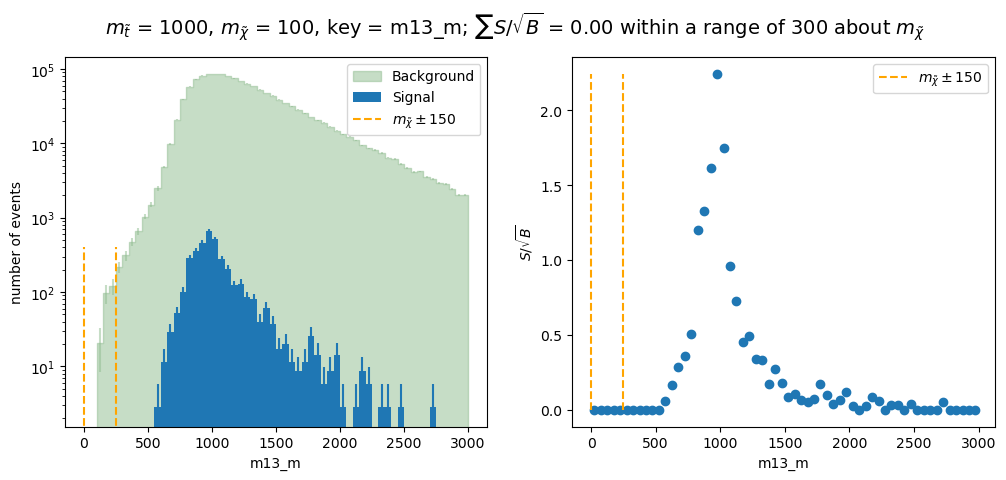

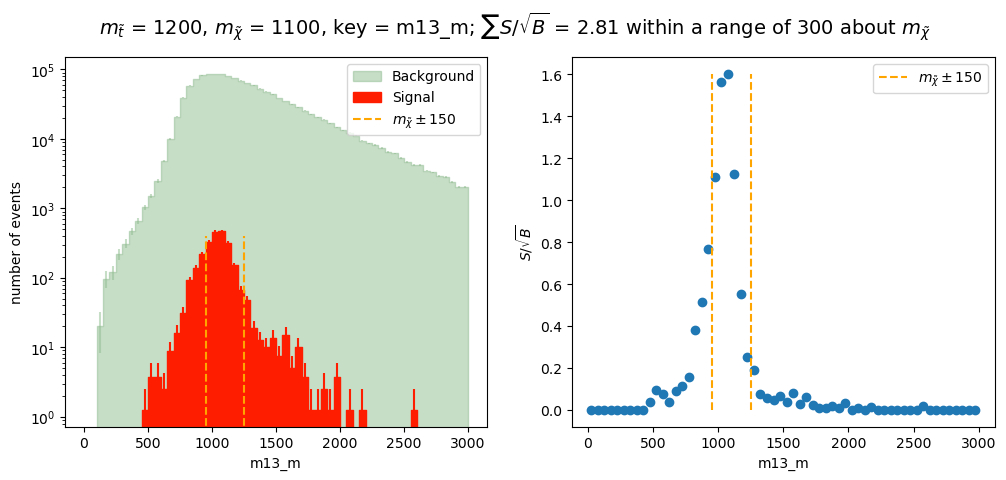

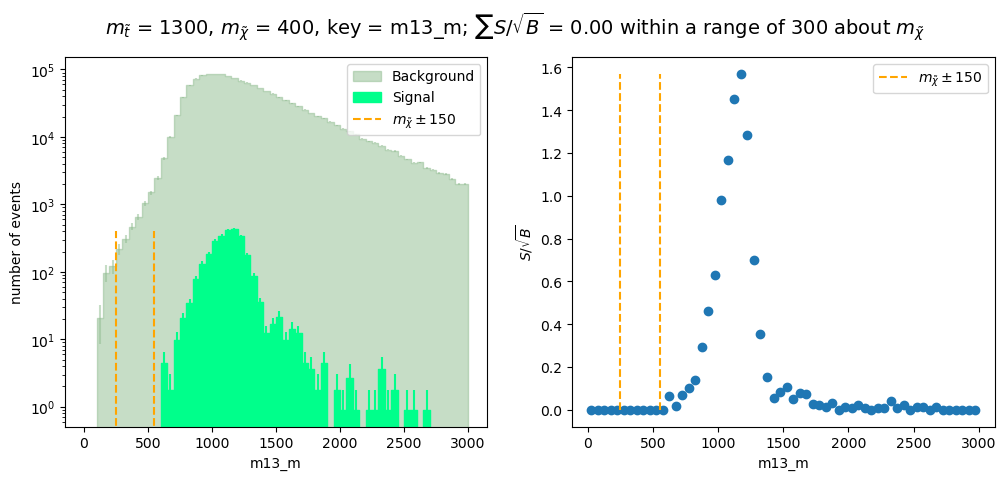

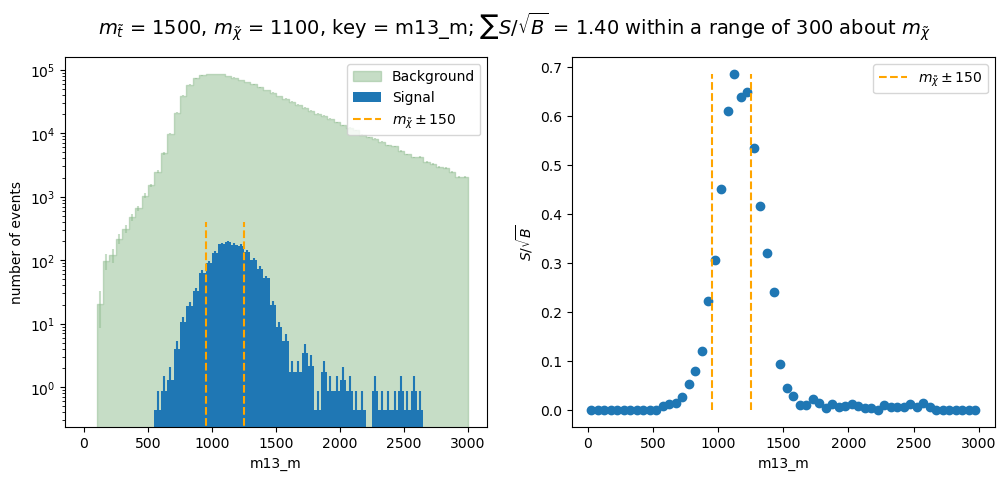

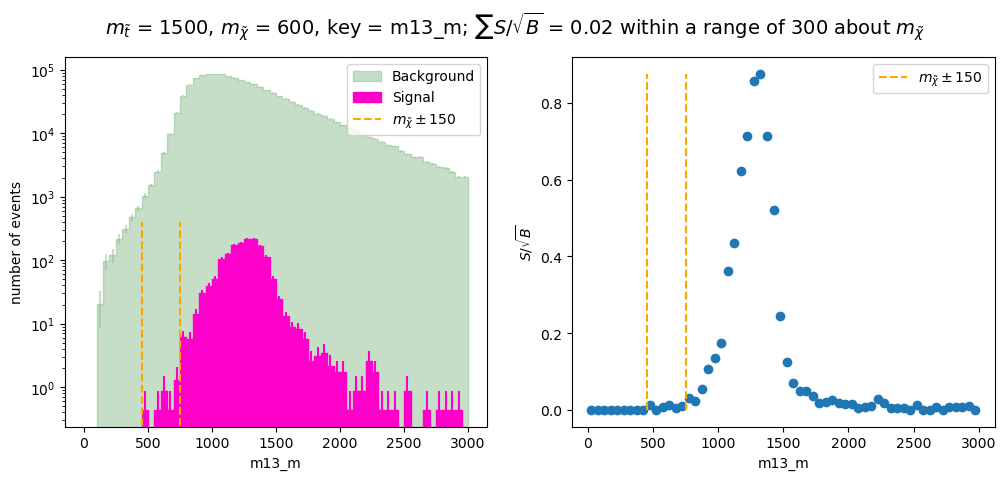

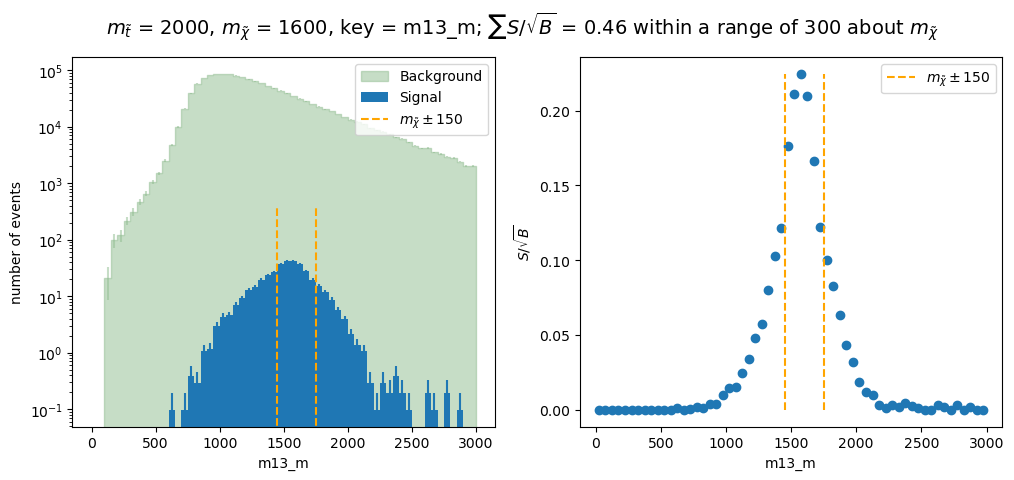

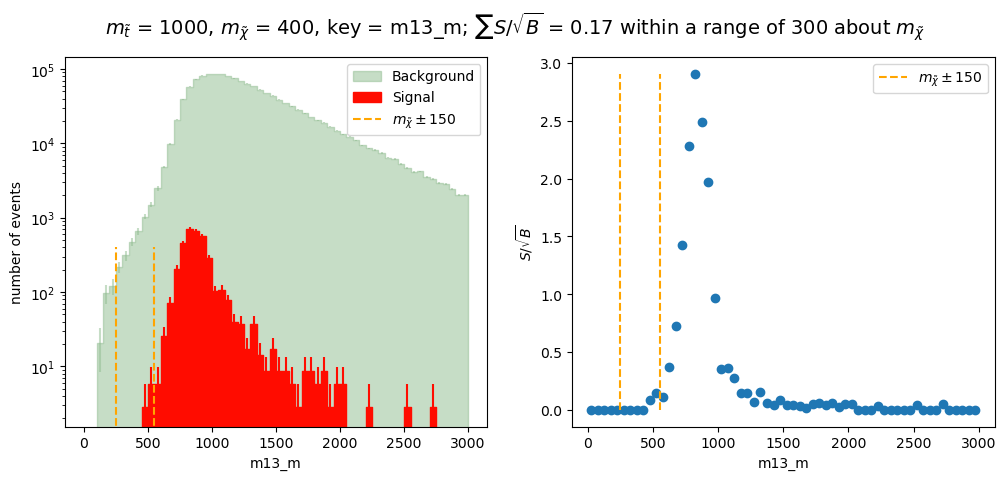

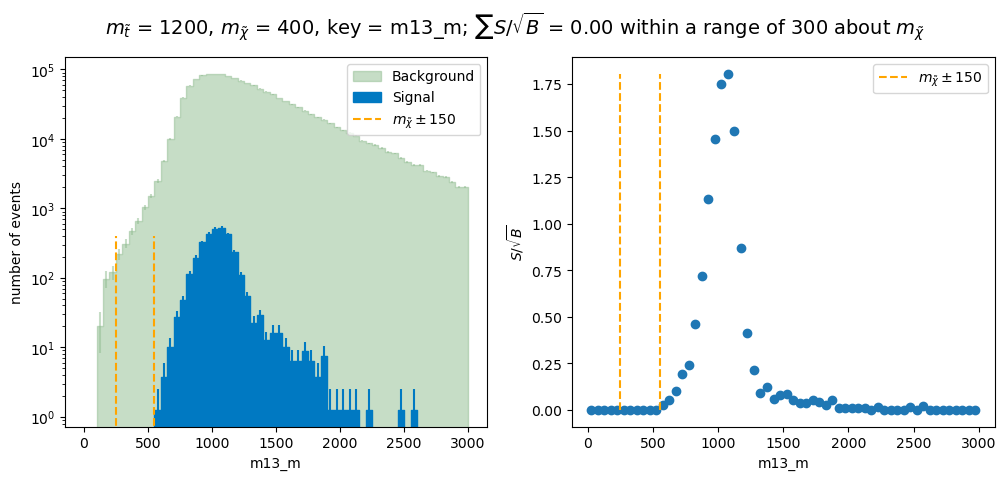

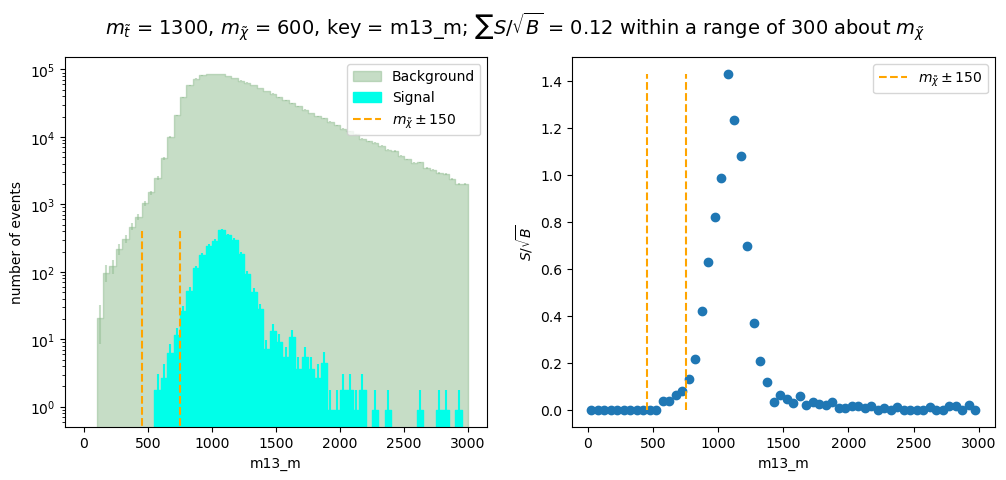

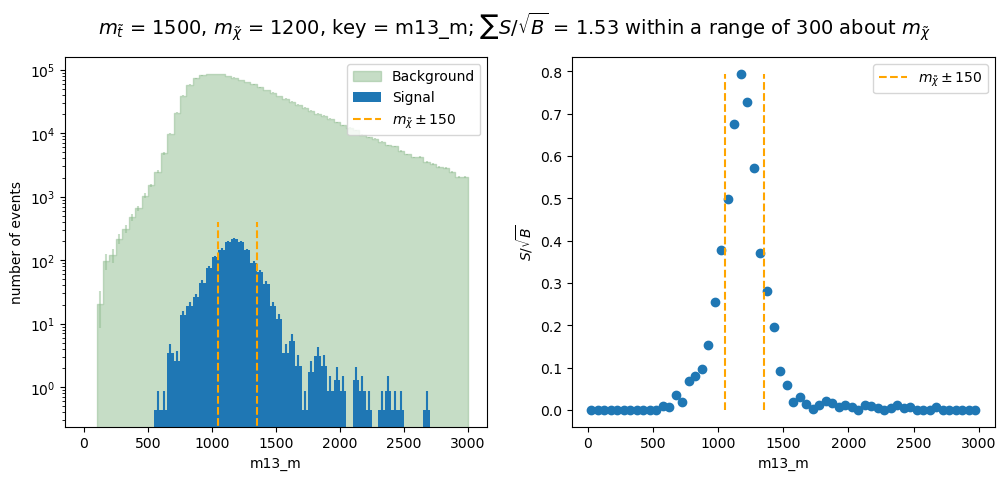

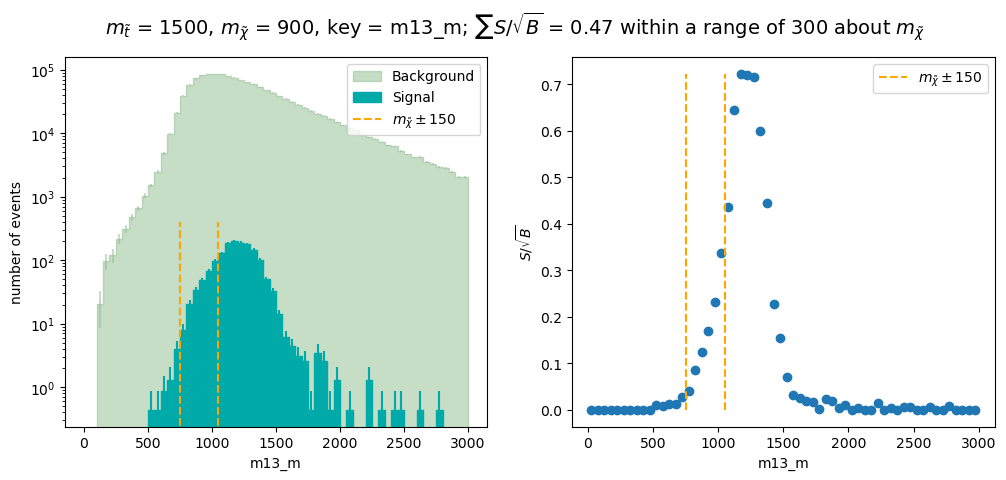

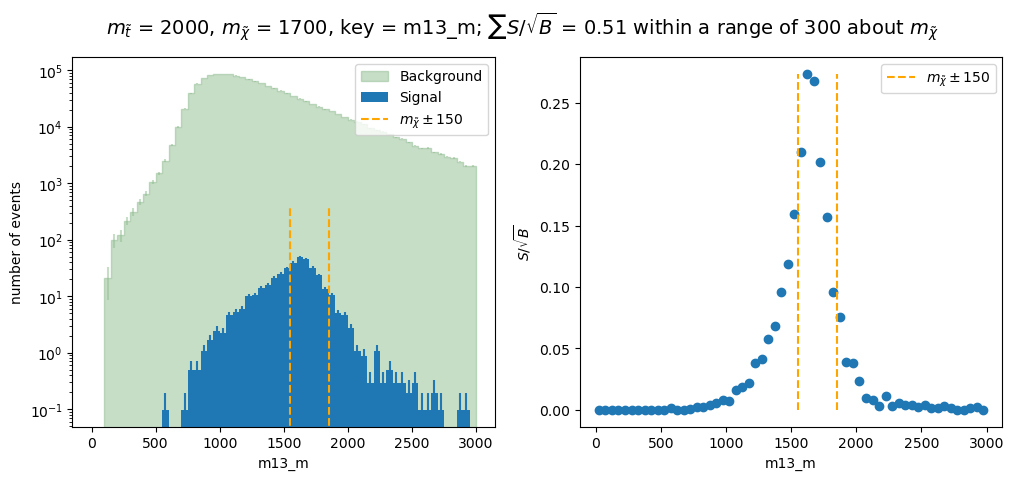

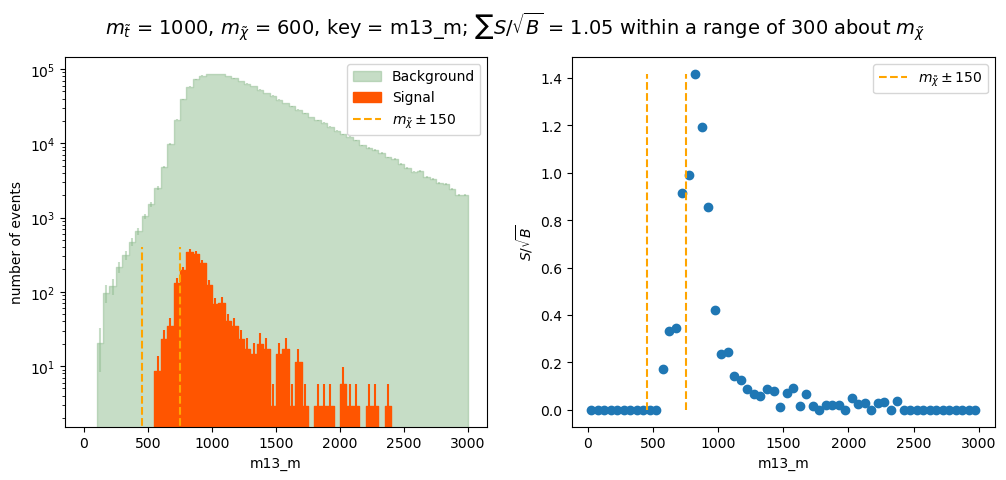

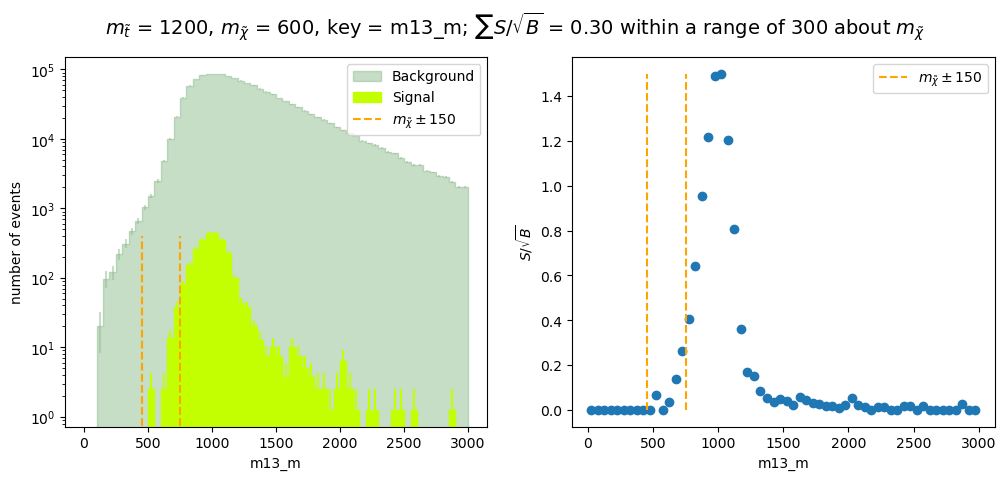

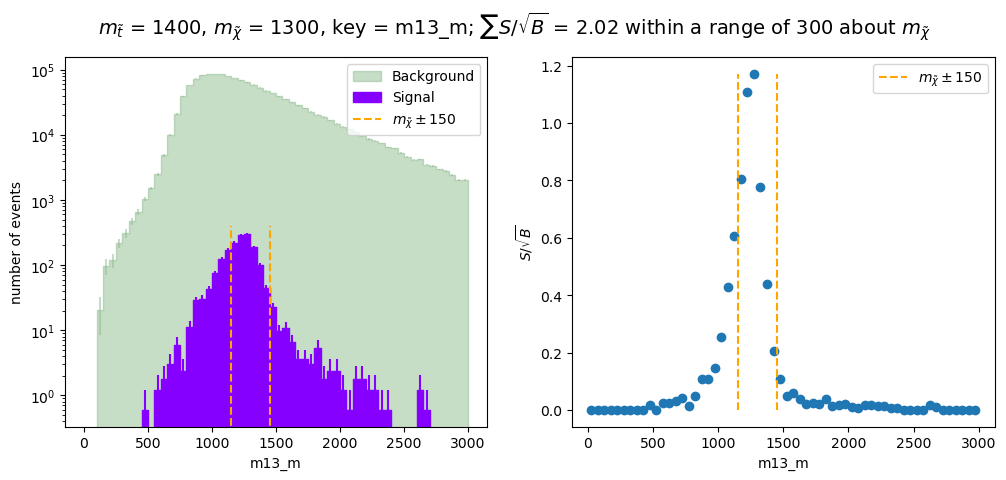

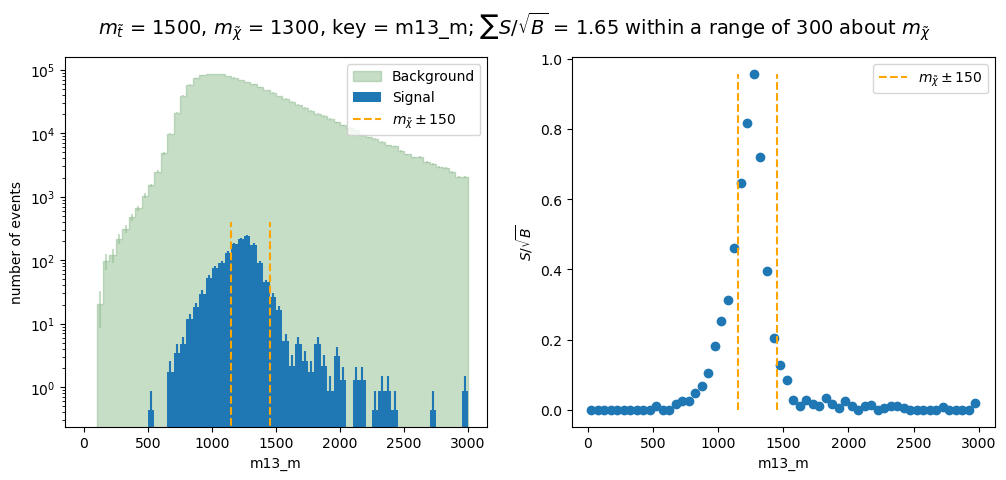

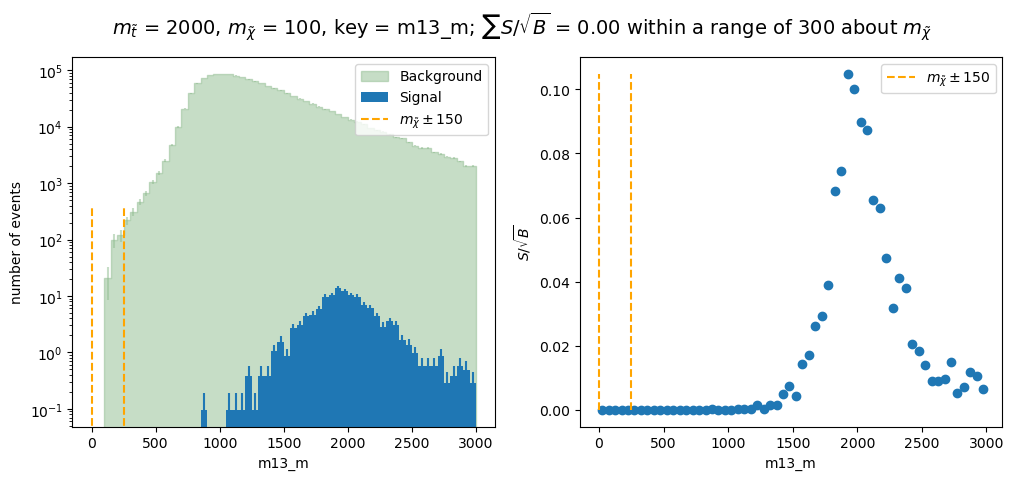

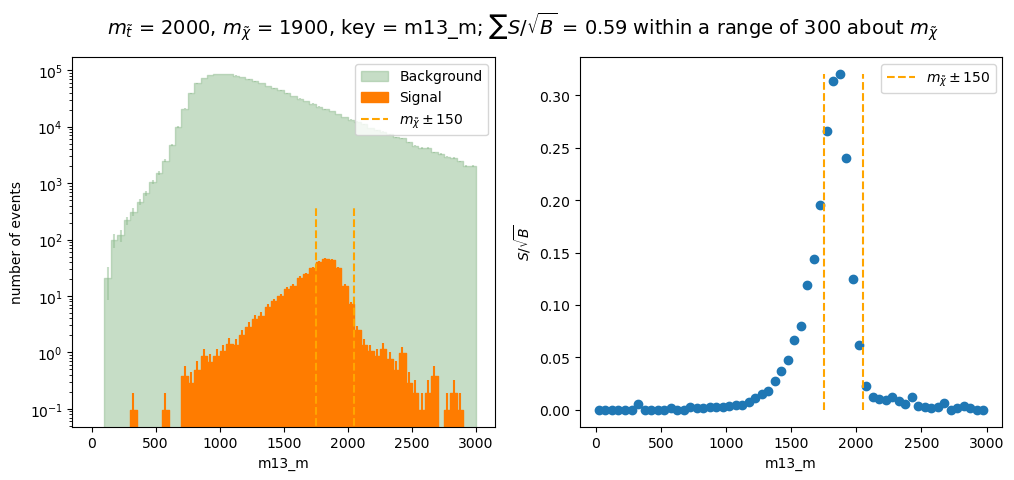

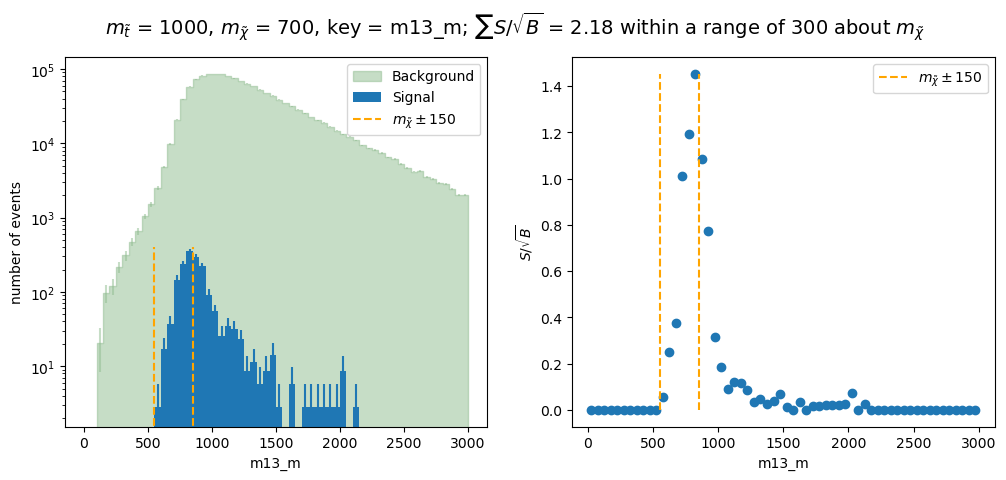

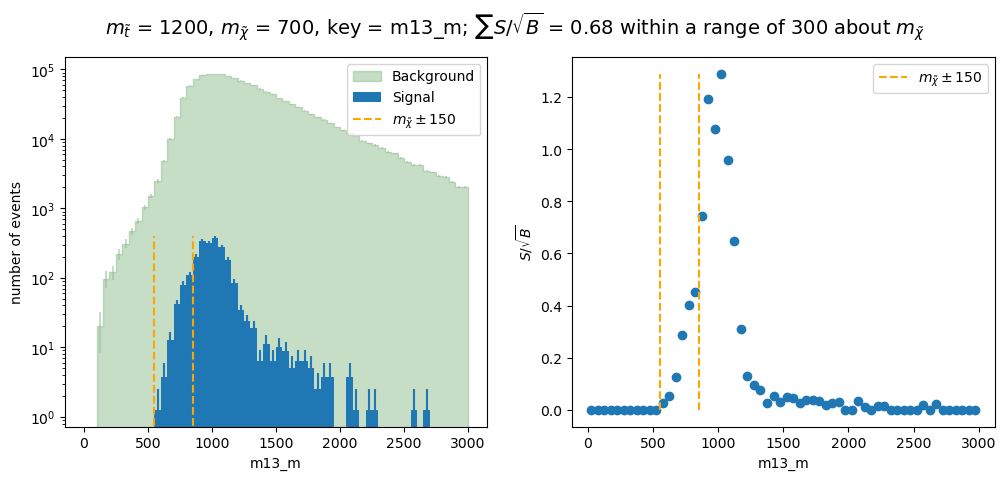

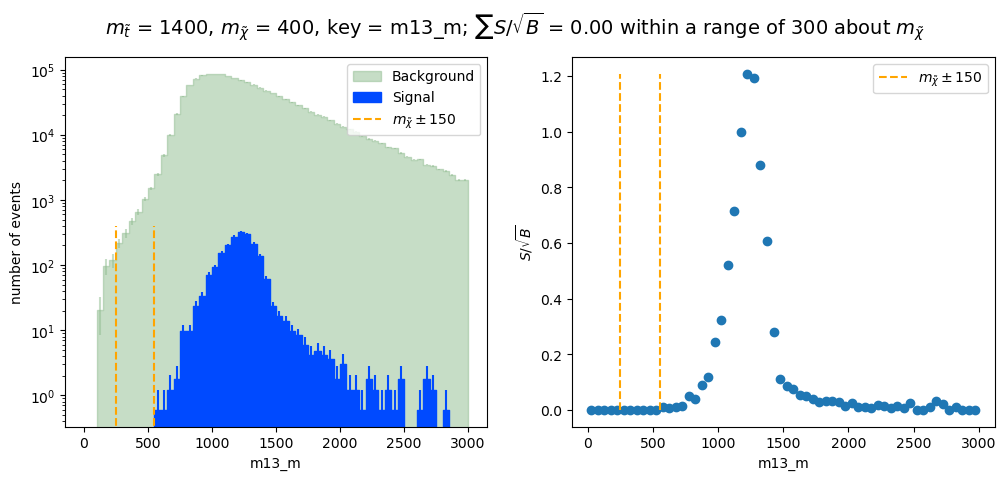

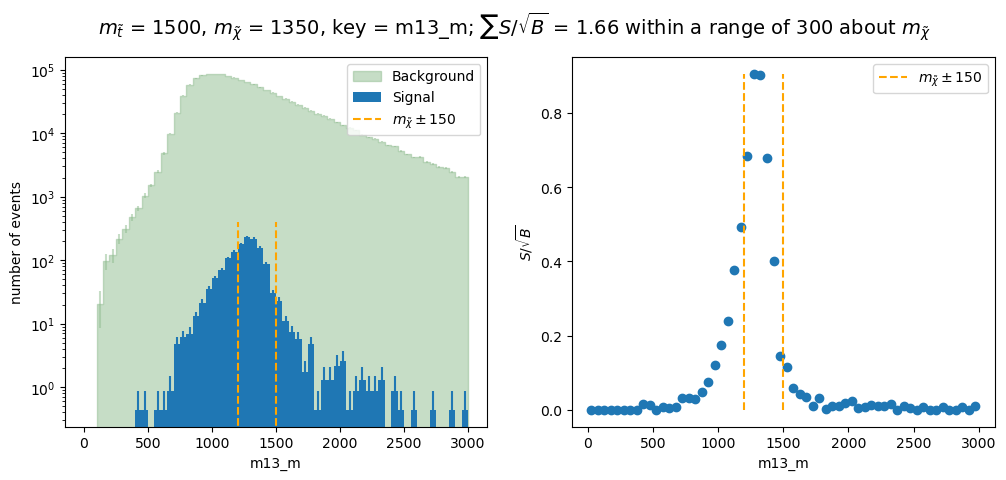

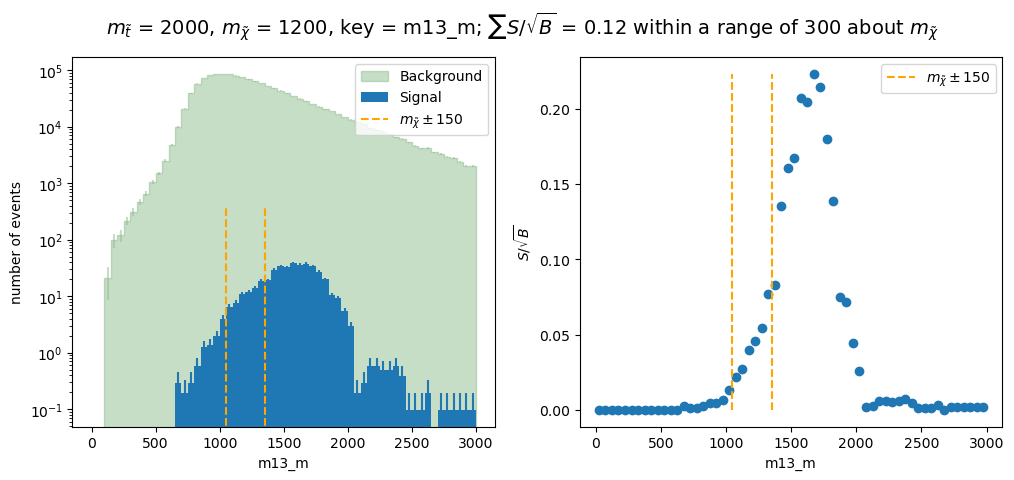

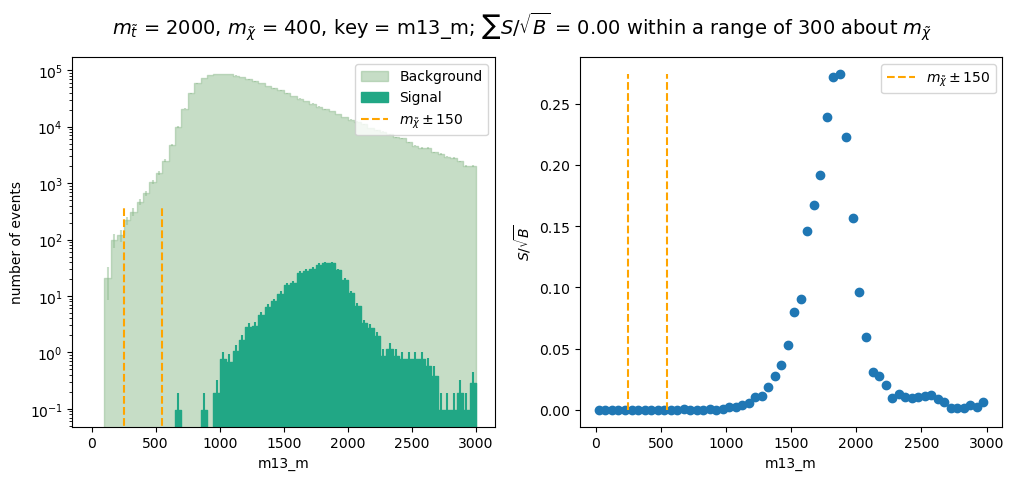

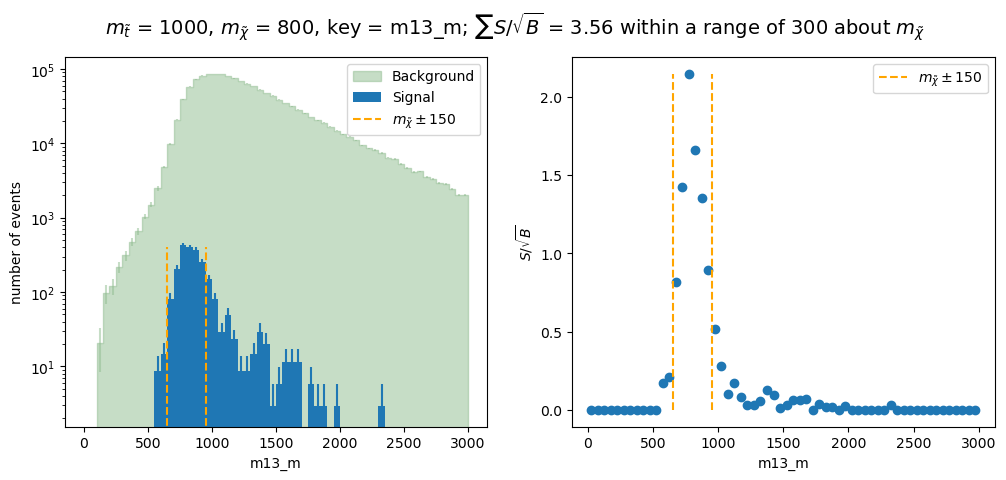

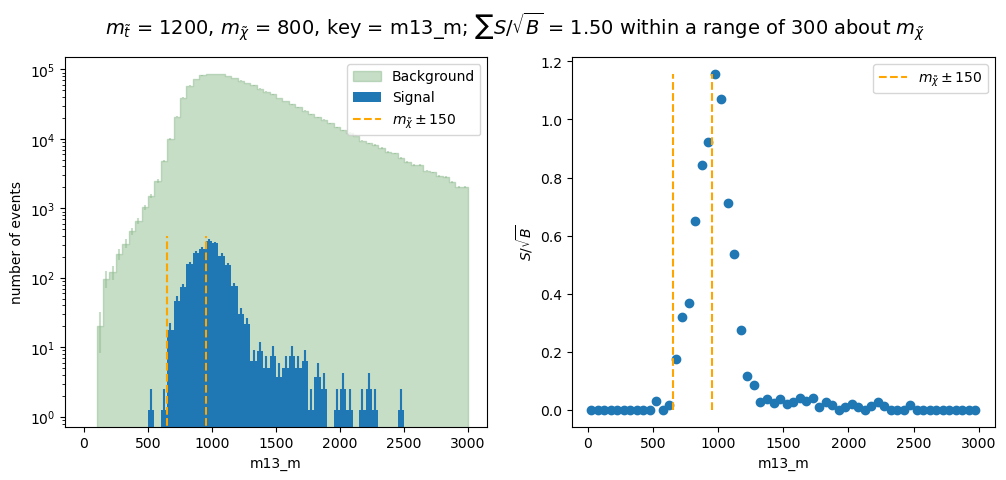

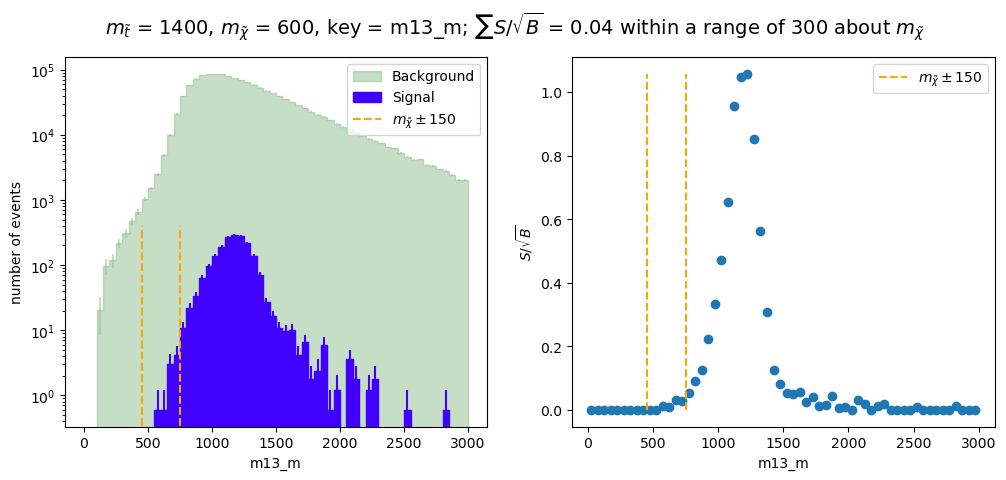

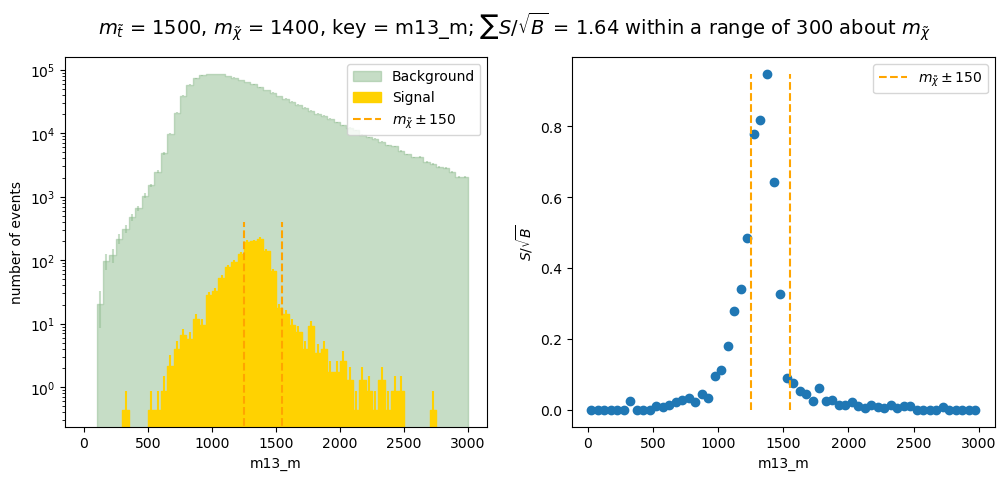

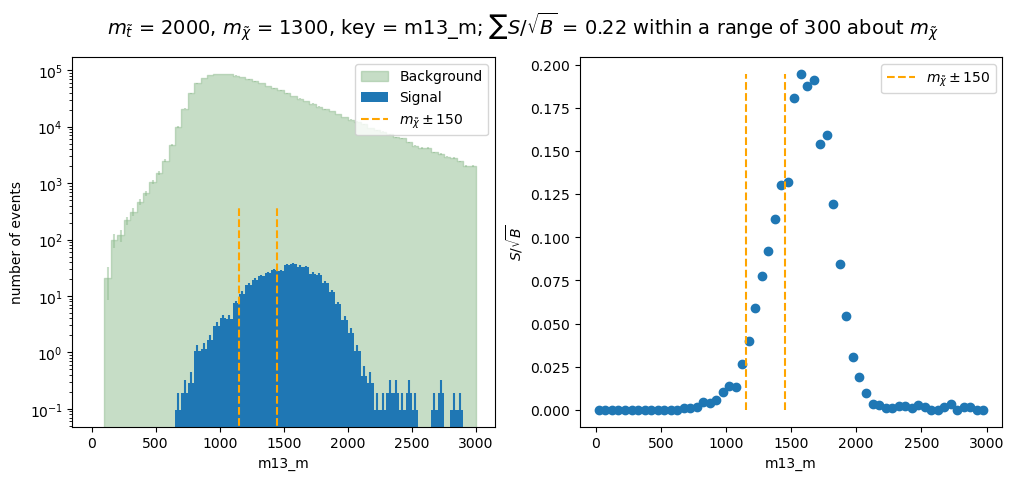

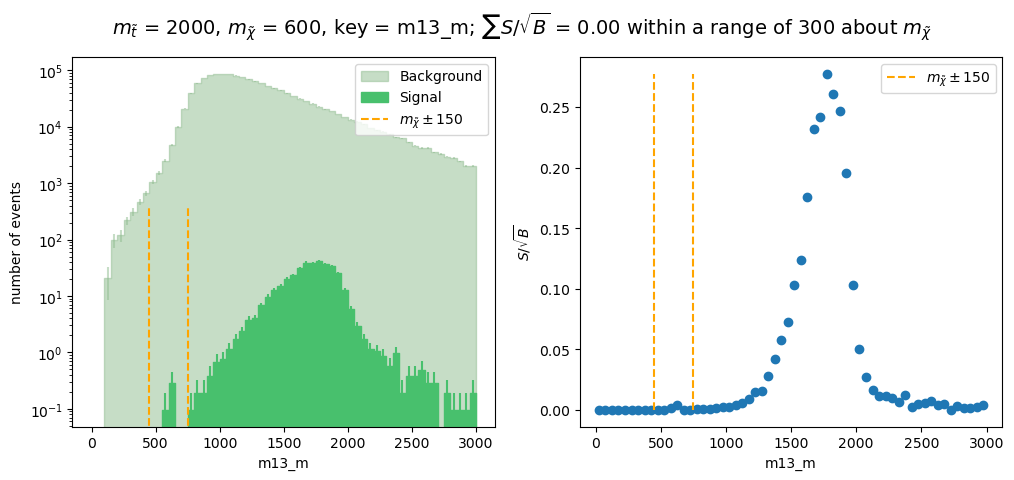

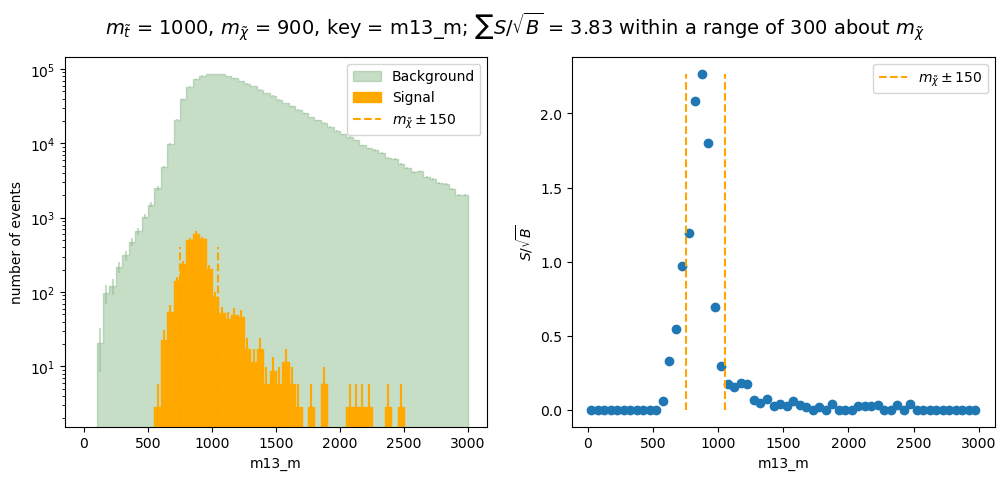

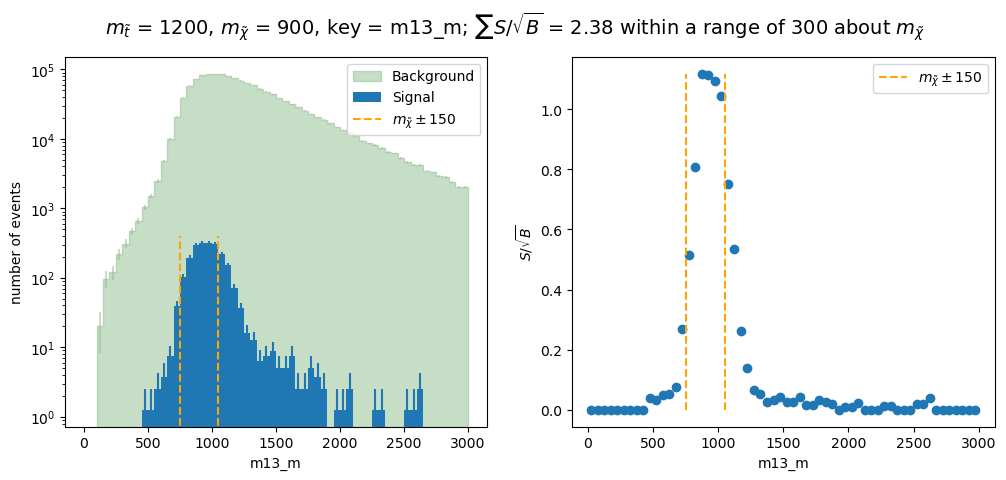

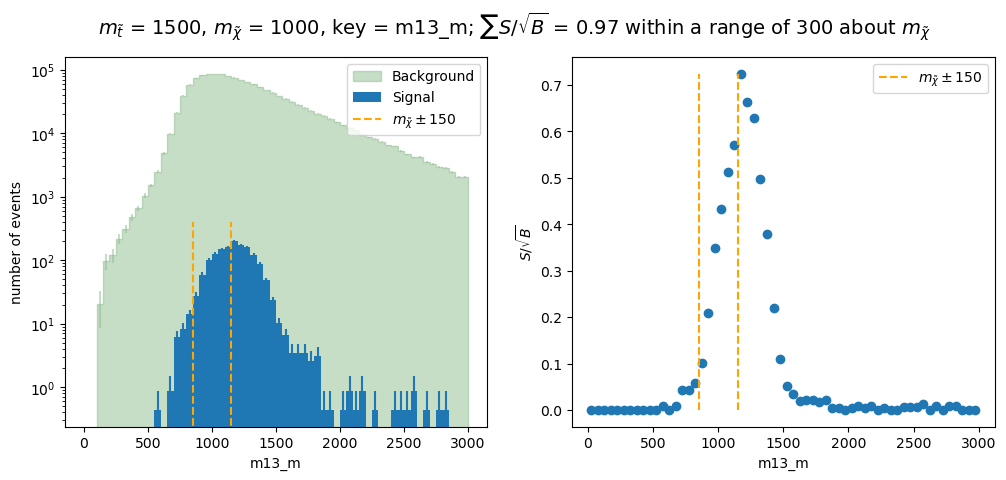

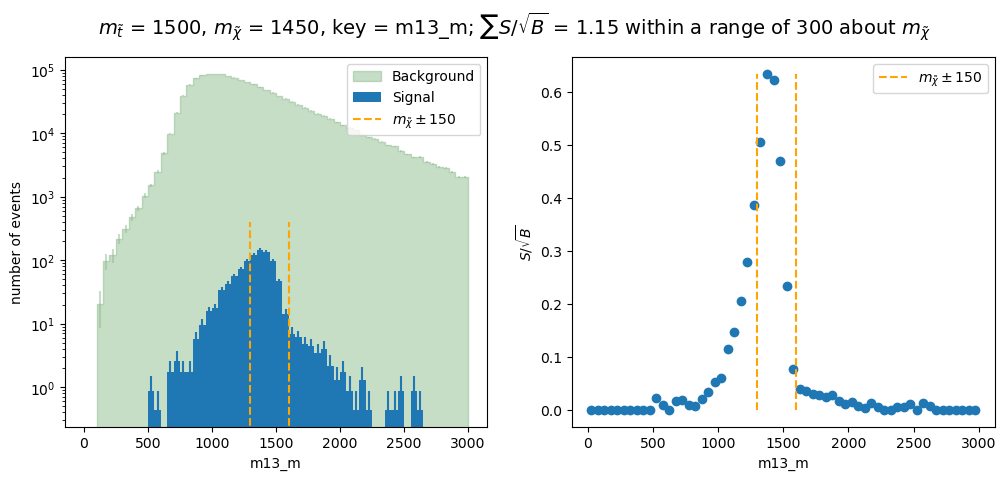

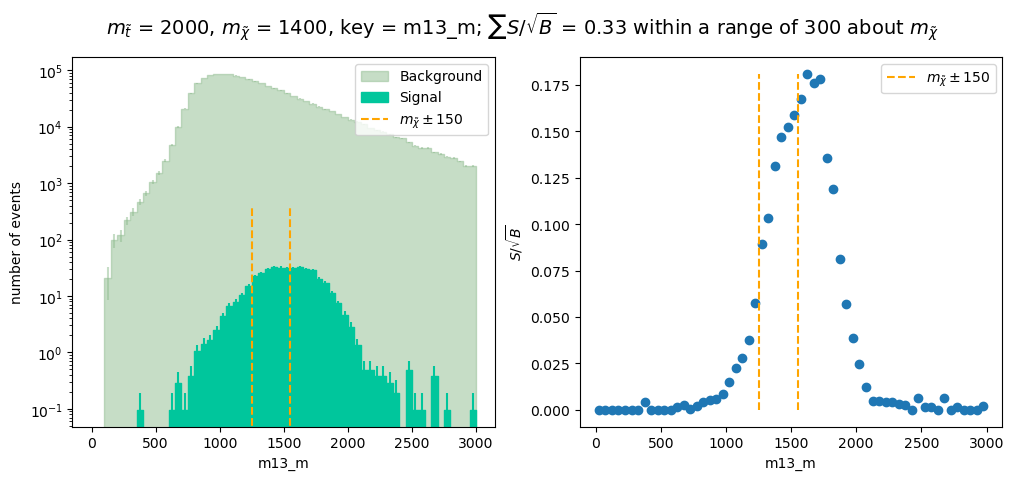

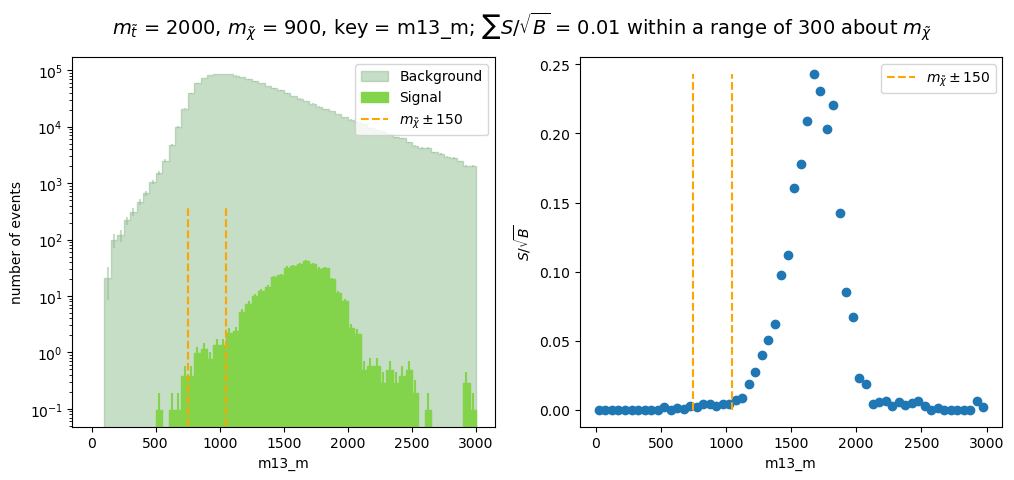

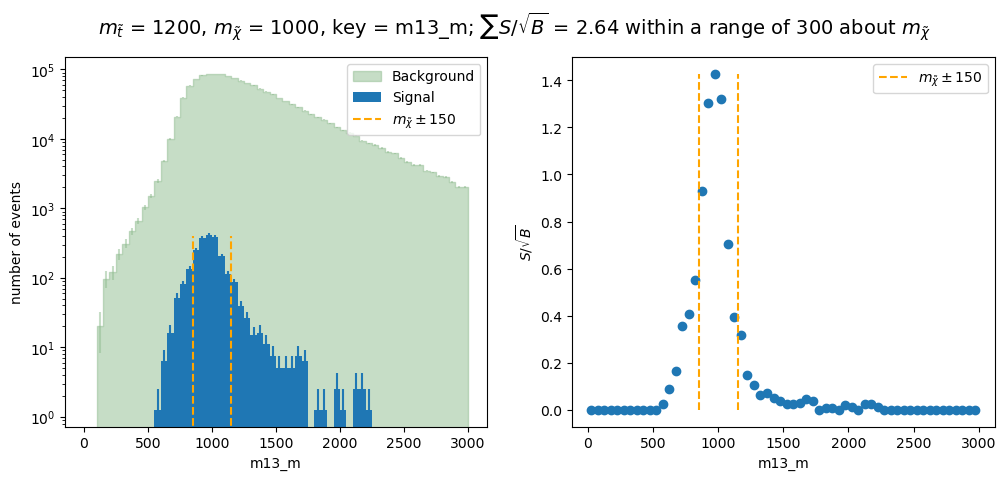

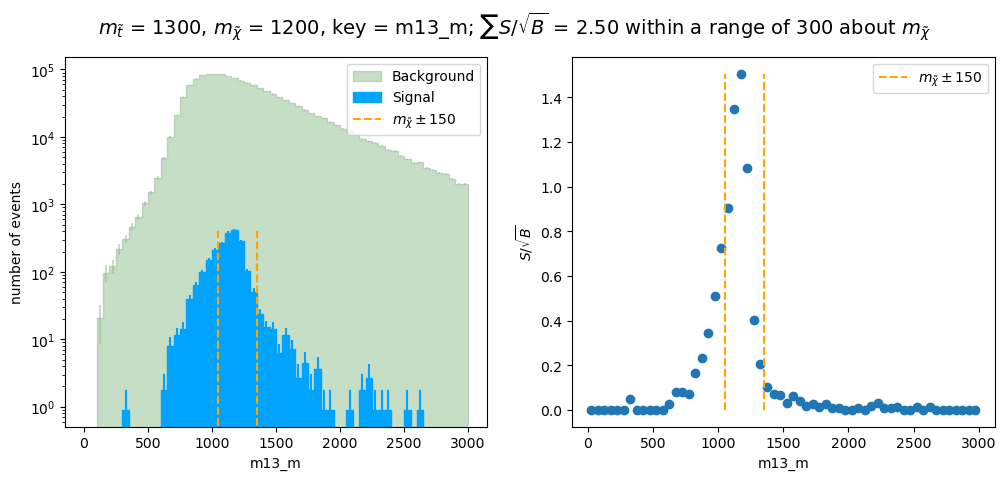

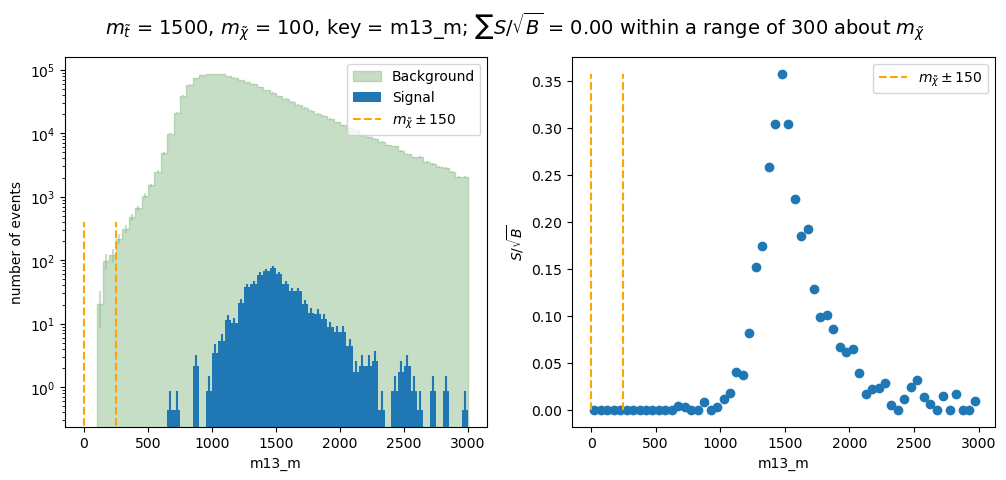

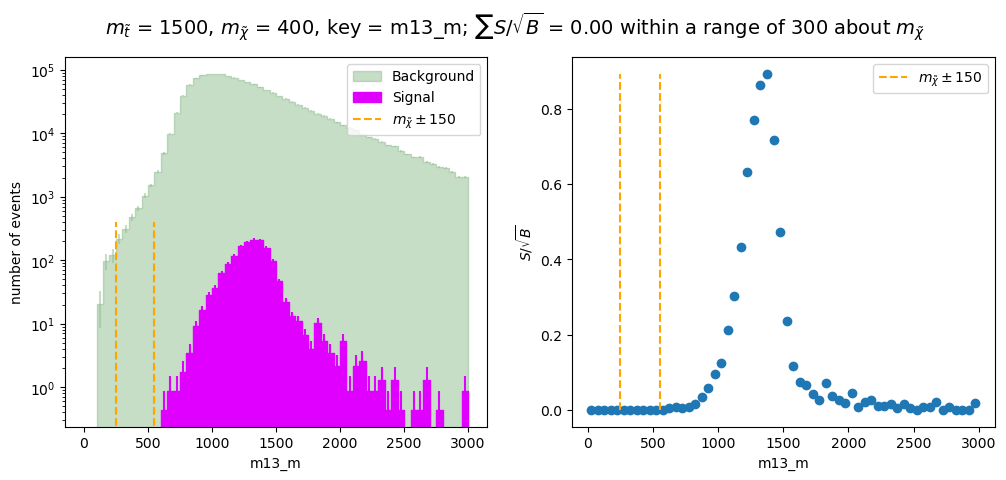

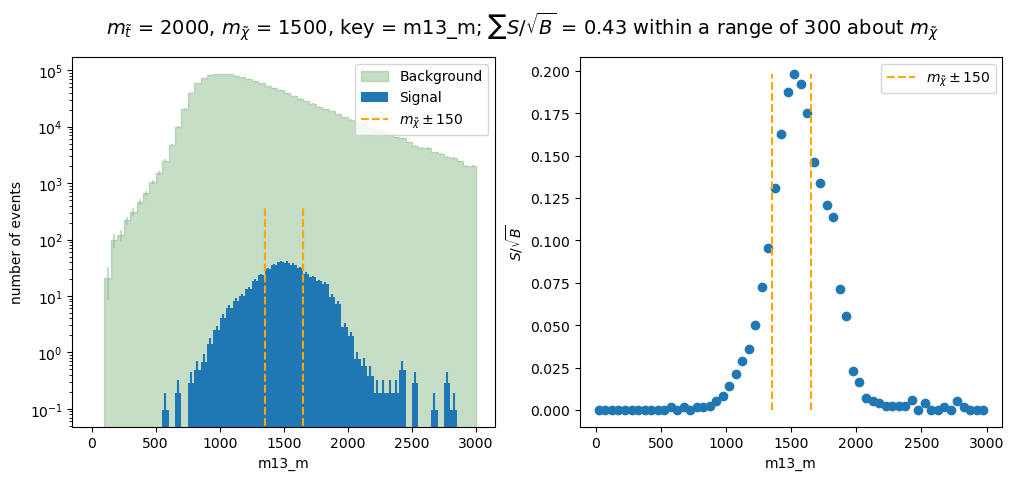

In [9]:
xvar = 'm13_m'
for signal in SIGNAL_NAMES:
    hists = a.results[signal].getScaledHistograms(s, None)
    signal_name_parts = signal.split('_')
    true_mtop = int(signal_name_parts[-2])
    true_mchi = int(signal_name_parts[-1])

    # if mchi/mtop >~ 0.7, we're in the compressed signal region
    s_over_root_b, bin_centers, points = pq.s_over_root_b(hists, bg_hists, xvar, true_mchi, sum_range_width)

    m13_m_points.append([true_mtop, true_mchi, s_over_root_b])

    signal_style = s.getSet(signal).style
    signal_obj = PlotObject.fromHist(hists[xvar], style=signal_style, title='Signal')
    background_obj = PlotObject.fromHist(bg_hists[xvar], style=background_style, title='Background')

    fig, ax = plt.subplots(1, 2)
    fig.suptitle(f"$m_\\tilde{{t}}$ = {true_mtop}, $m_\\tilde{{\chi}}$ = {true_mchi}, key = {xvar}; $\sum S/\sqrt{{B}}$ = {s_over_root_b:.2f} within a range of {sum_range_width} about $m_\\tilde{{\chi}}$", fontsize=14)
    fig.set_figwidth(12)
    ax[0].set_xlabel(xvar)
    ax[0].set_ylabel("number of events")
    ax[0].set_yscale("log")
    ax[1].set_xlabel(xvar)
    ax[1].set_ylabel("$S/\sqrt{B}$")
    # ax.set_title("Scatter plot of S/sqrt(B)")
    drawAs1DHist(ax[0], background_obj)
    drawAs1DHist(ax[0], signal_obj)
    ax[0].vlines([max(0, true_mchi-sum_range_width/2), true_mchi+sum_range_width/2], 0, 1000, colors='orange', linestyles='dashed', label=f'$m_{{\\tilde{{\chi}}}} \pm {round(sum_range_width/2)}$')
    ax[1].vlines([max(0, true_mchi-sum_range_width/2), true_mchi+sum_range_width/2], 0, max(points), colors='orange', linestyles='dashed', label=f'$m_{{\\tilde{{\chi}}}} \pm {round(sum_range_width/2)}$')
    ax[1].scatter(bin_centers, points)
    ax[0].legend()
    ax[1].legend()
    # print(f"m_t = {true_mtop}, m_chi = {true_mchi}, s/sqrt(b) summed in quadrature around m_chi = {s_over_root_b}")

/tmp/ipykernel_1366222/4119519727.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 2)


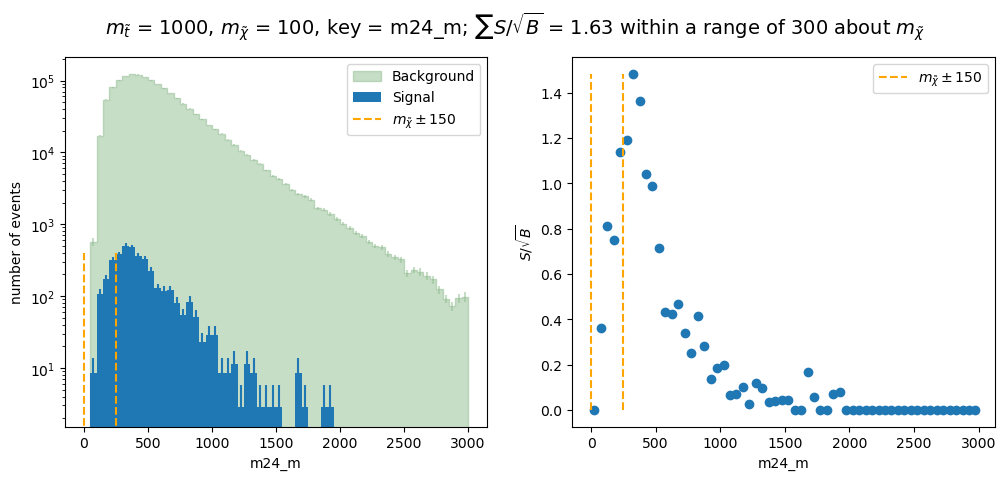

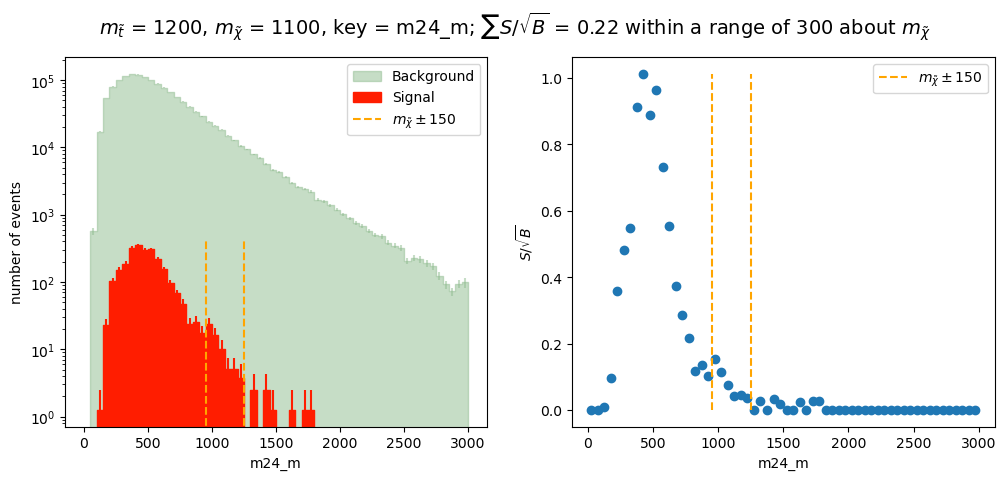

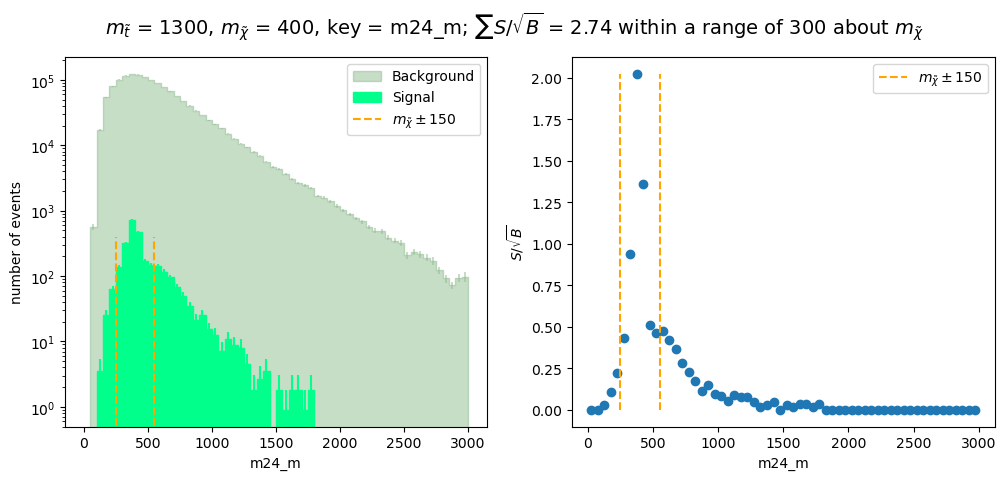

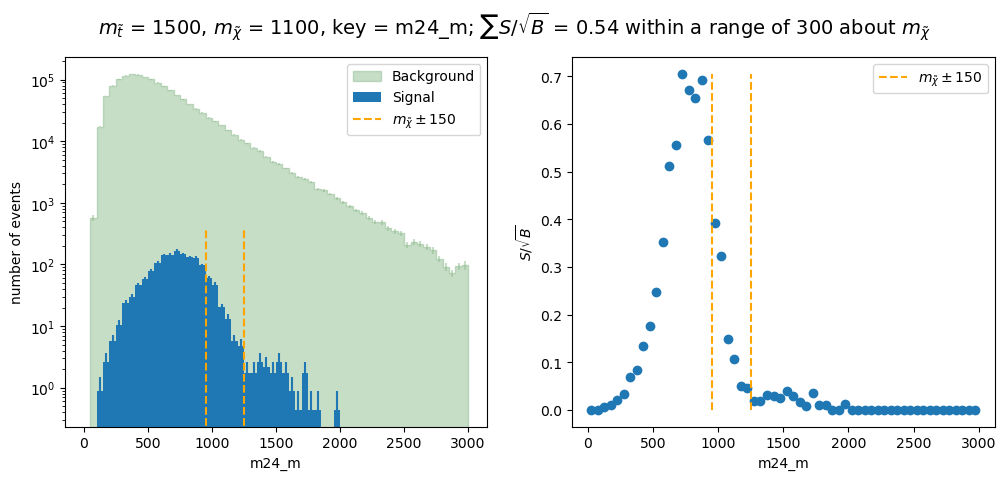

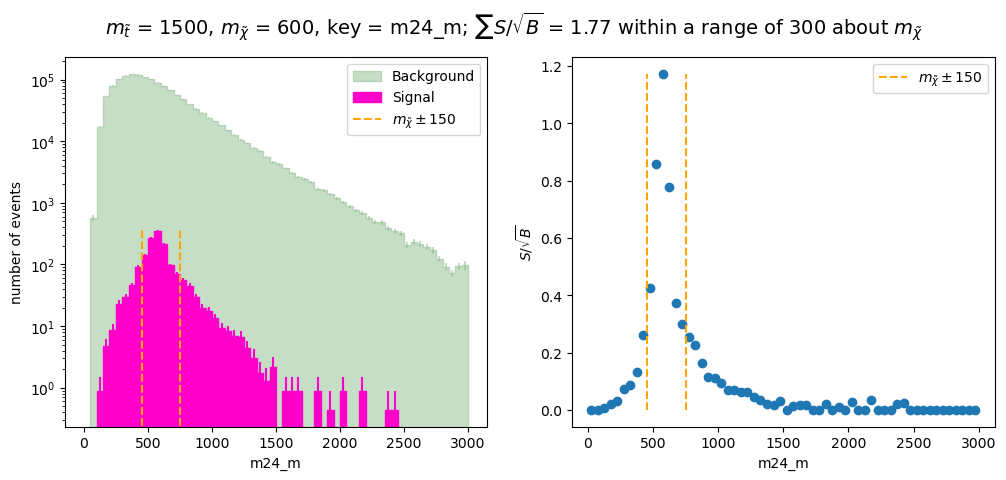

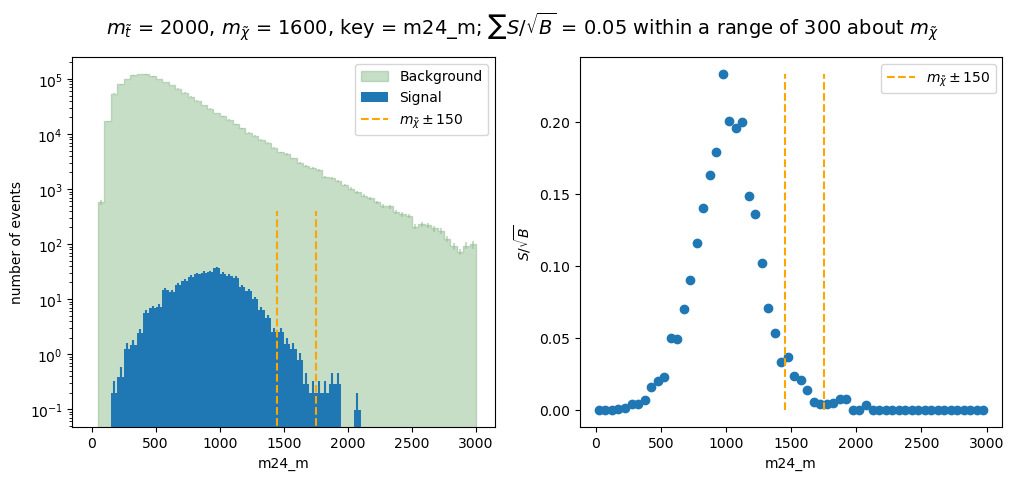

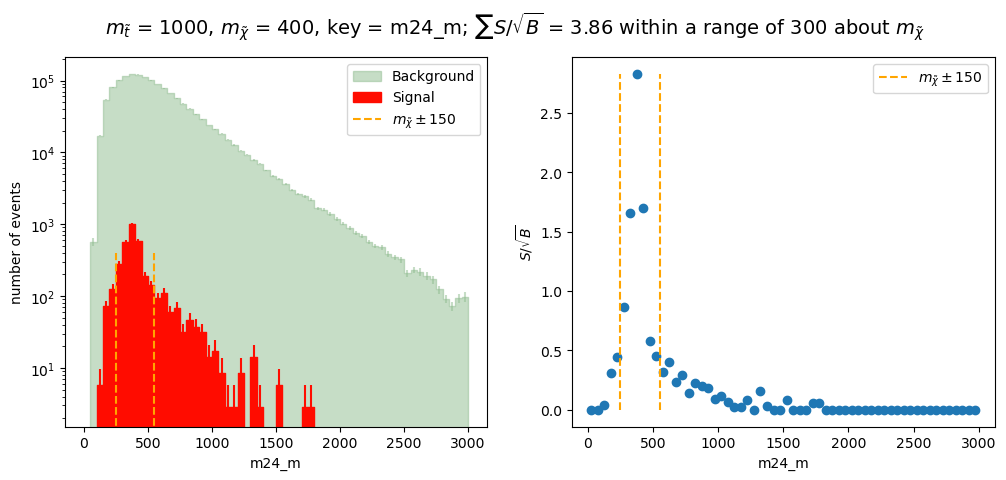

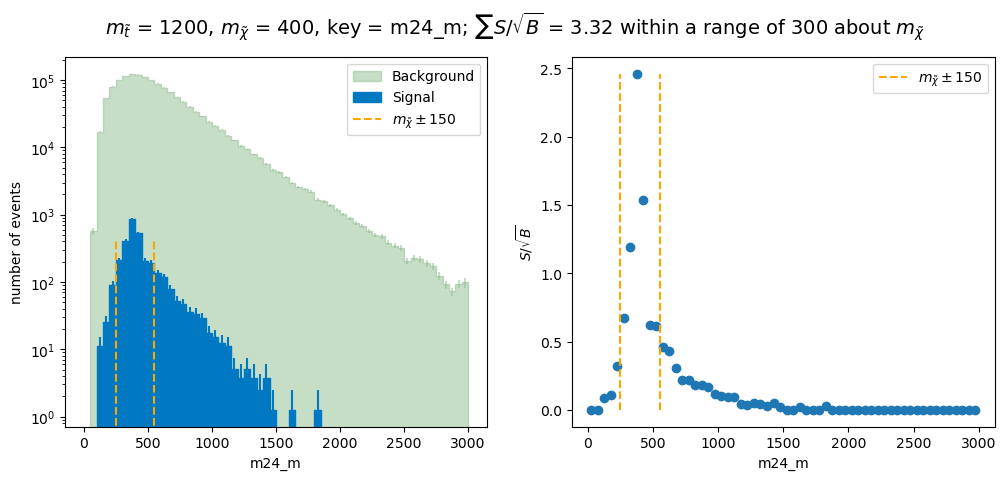

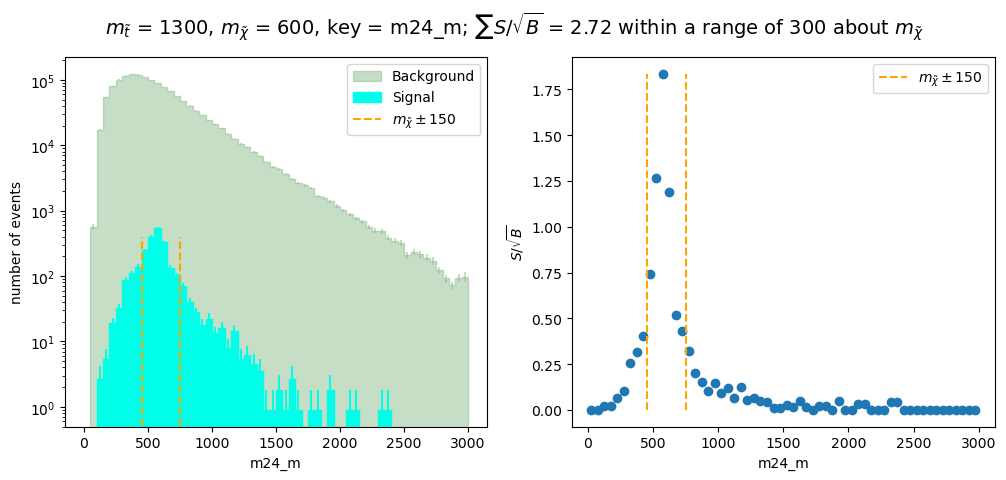

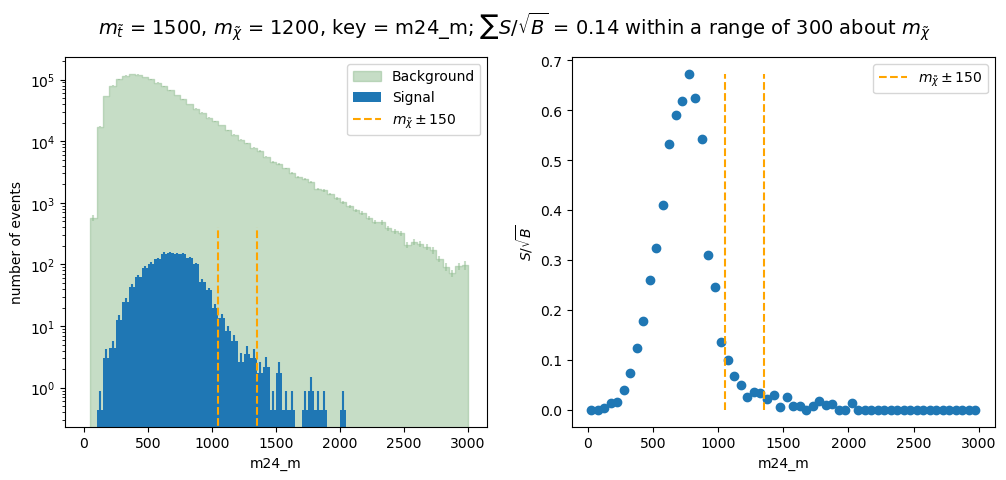

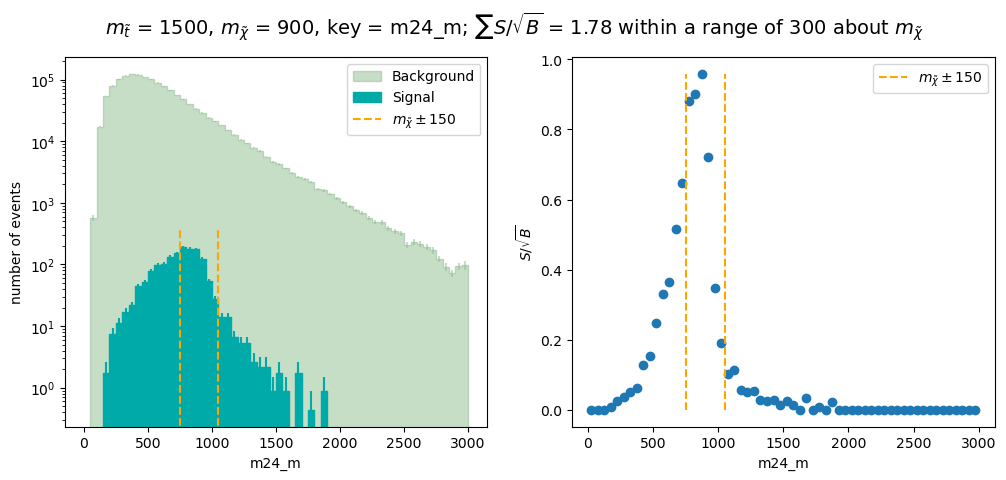

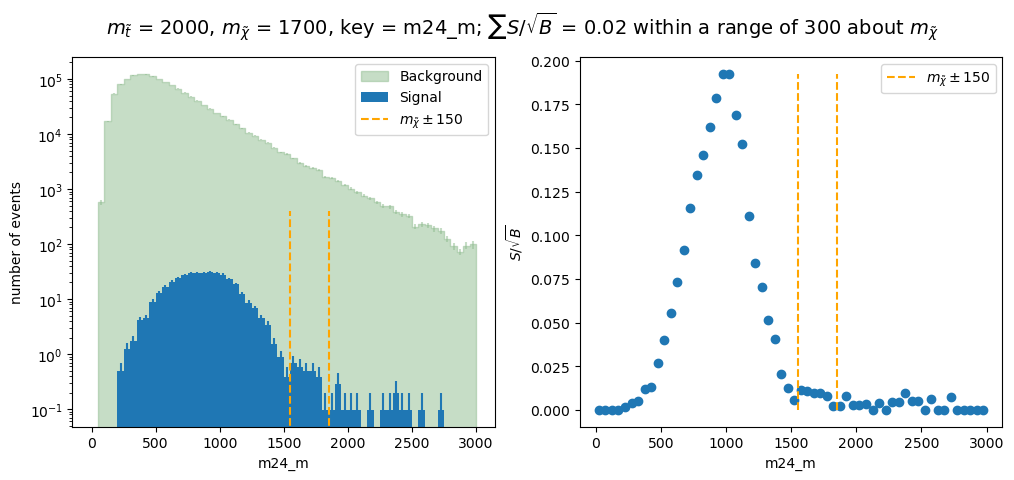

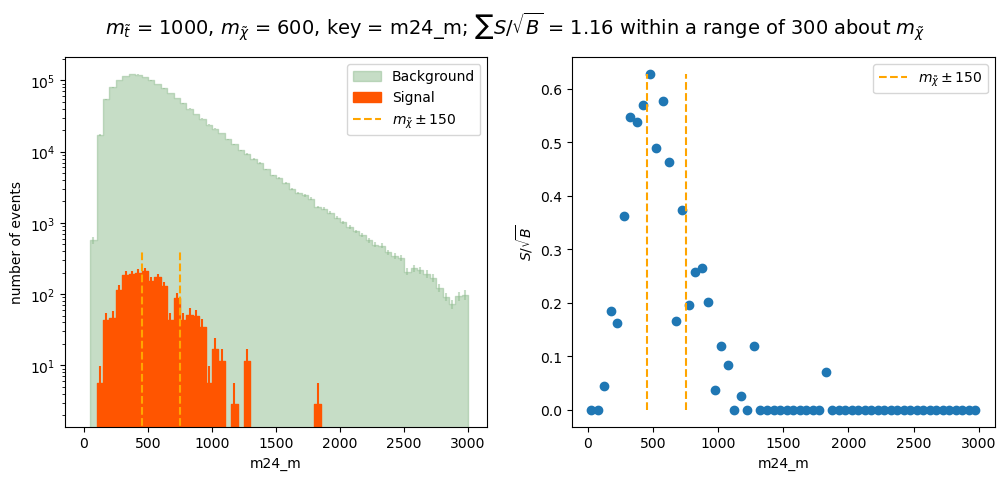

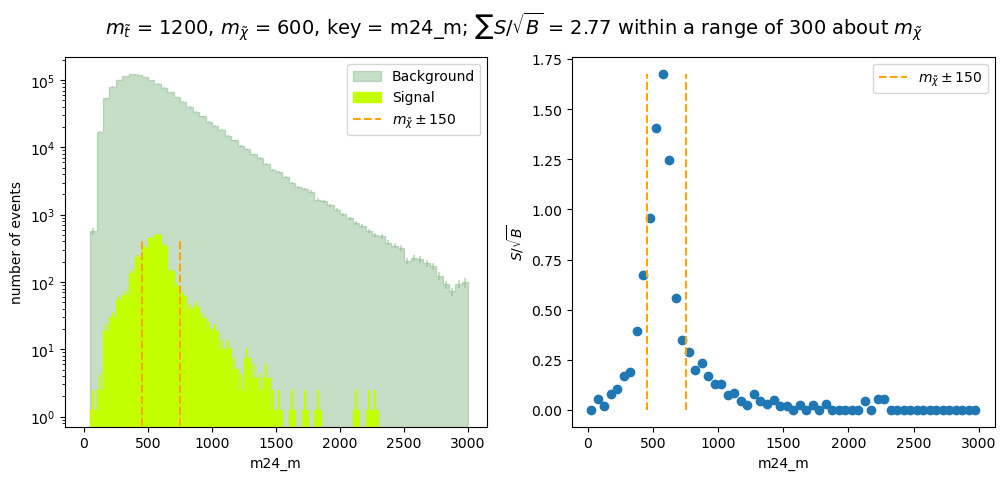

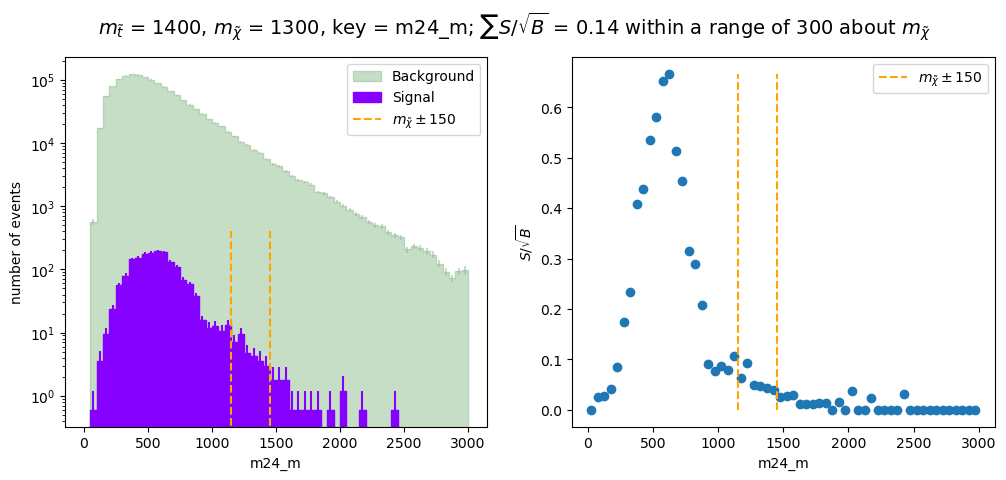

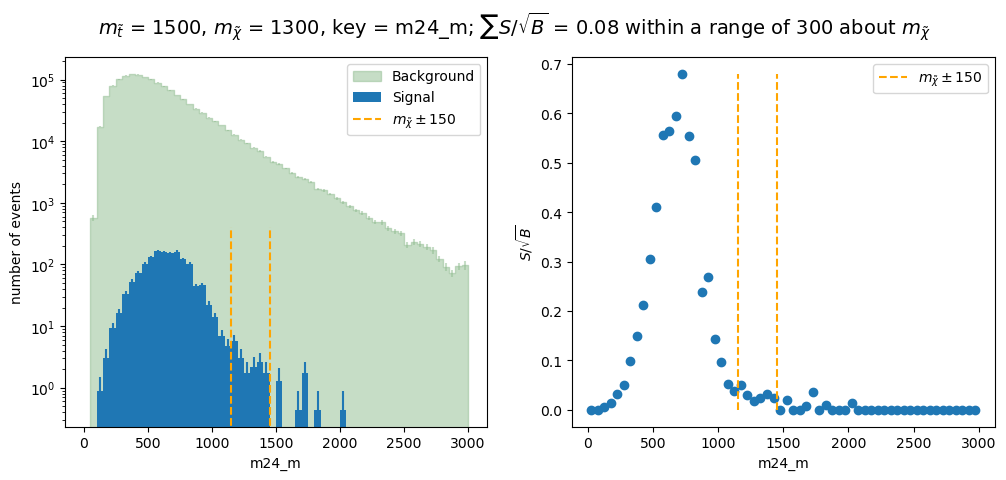

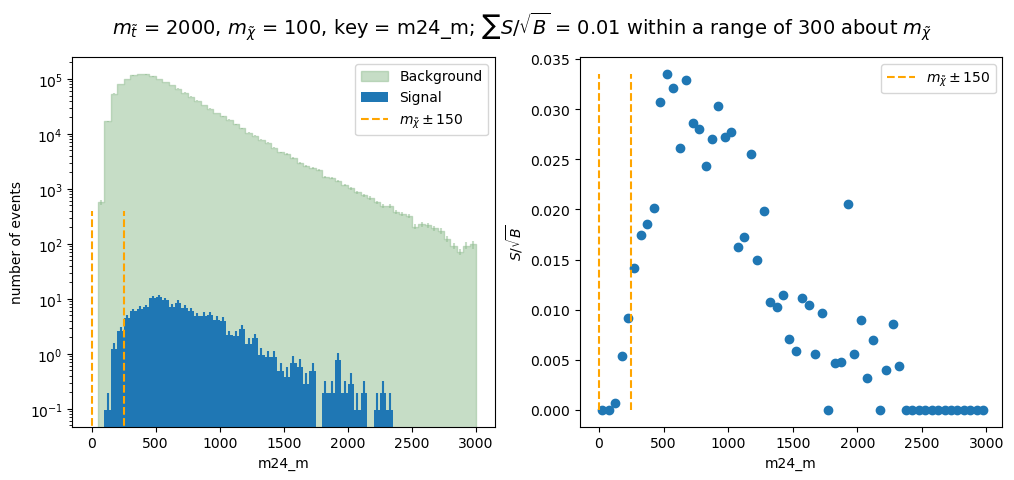

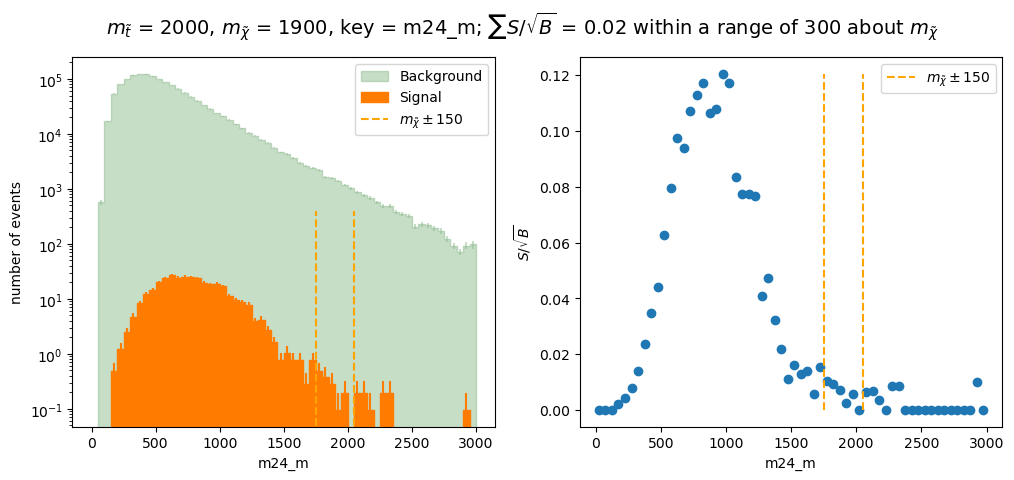

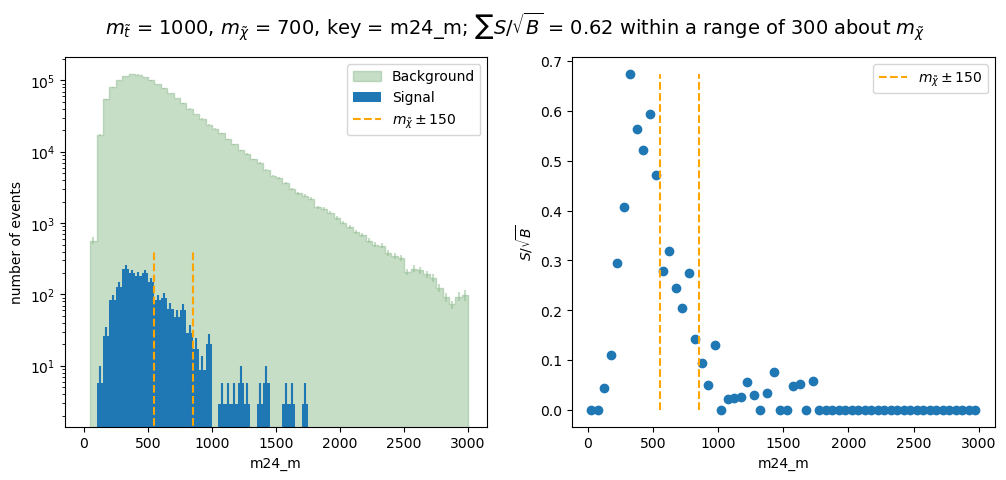

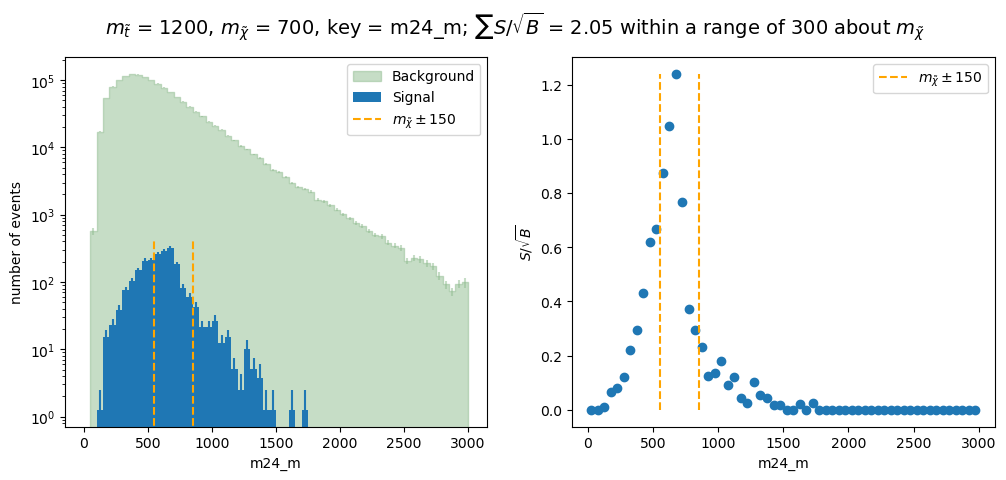

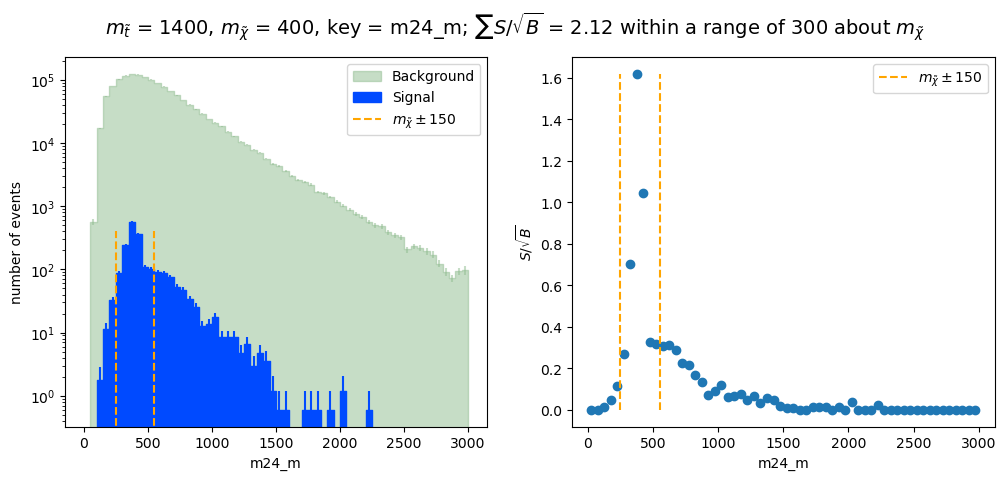

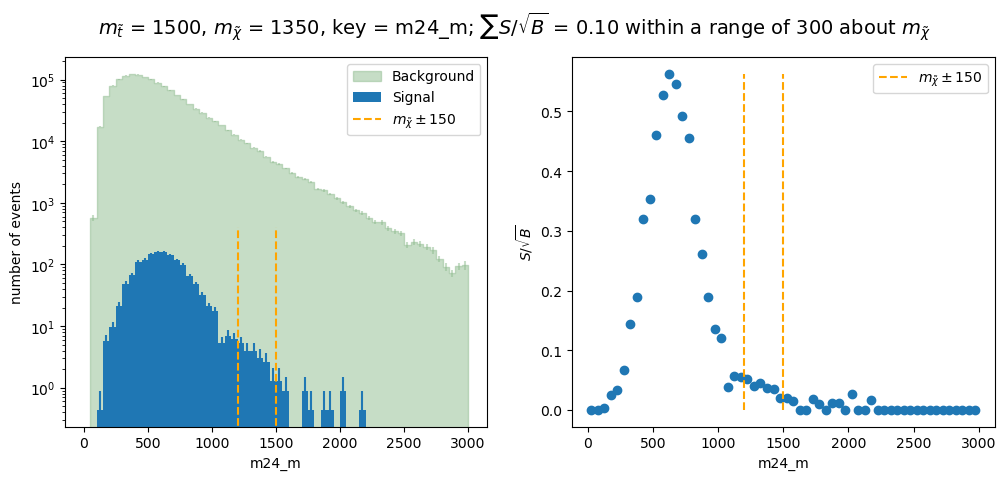

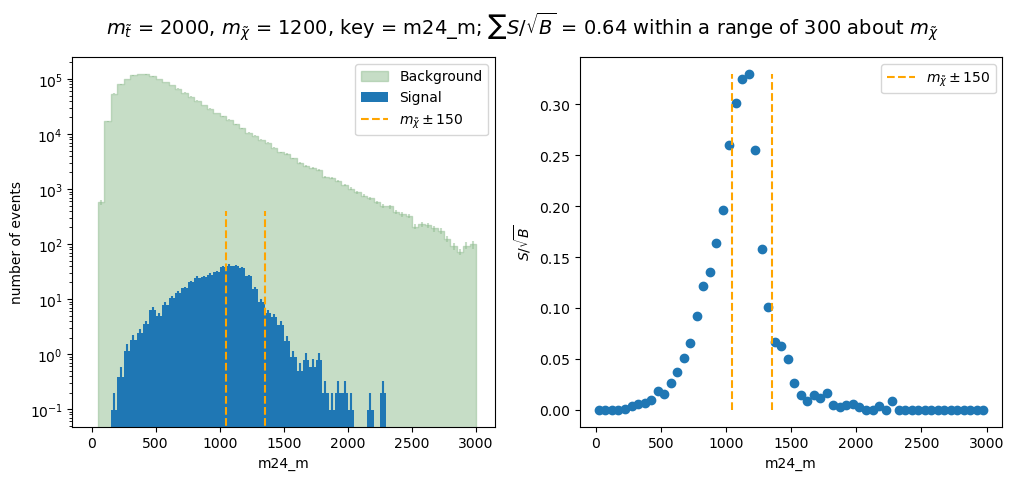

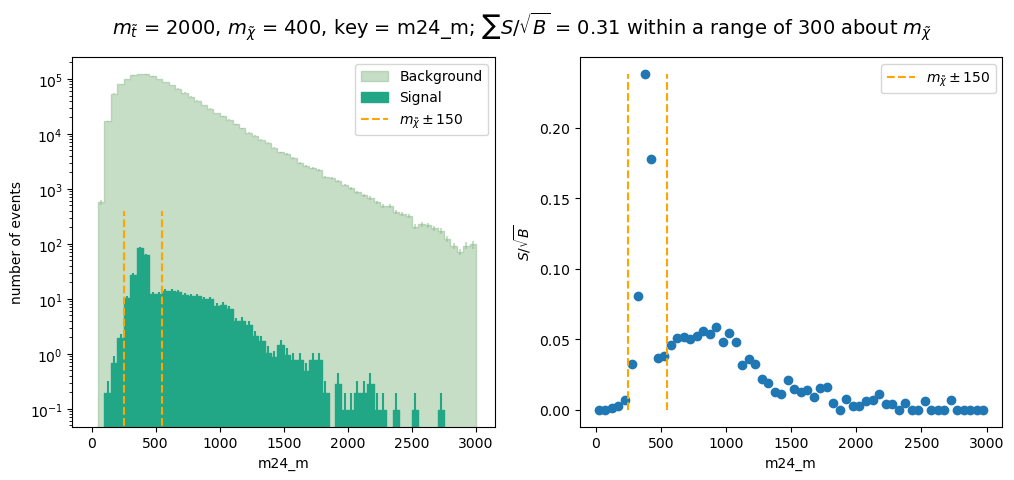

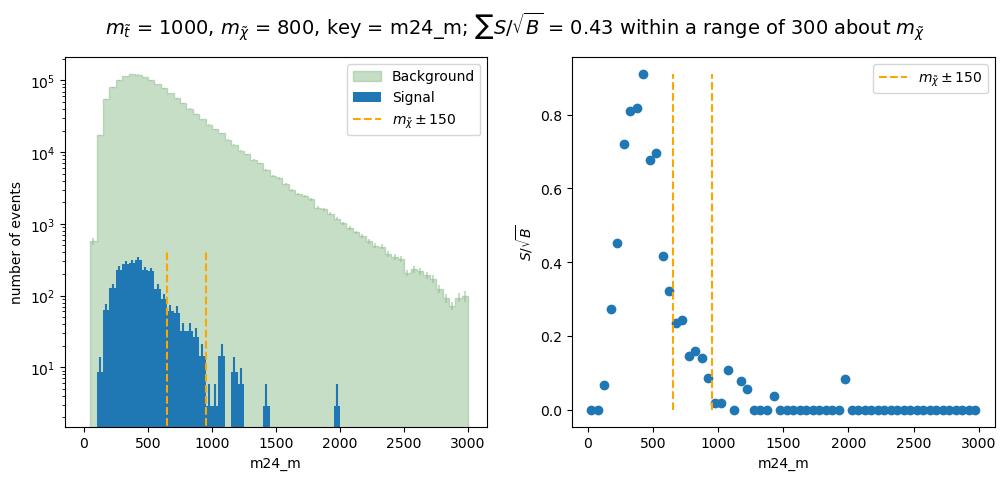

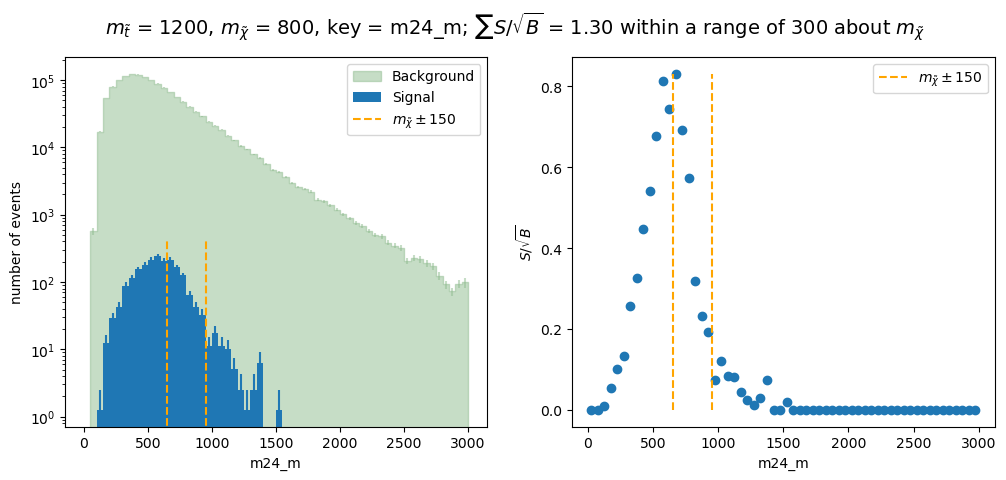

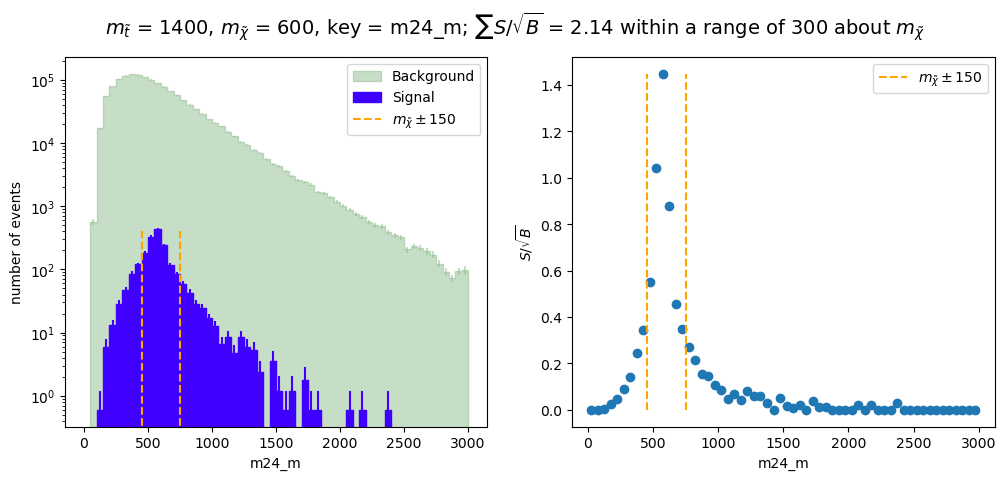

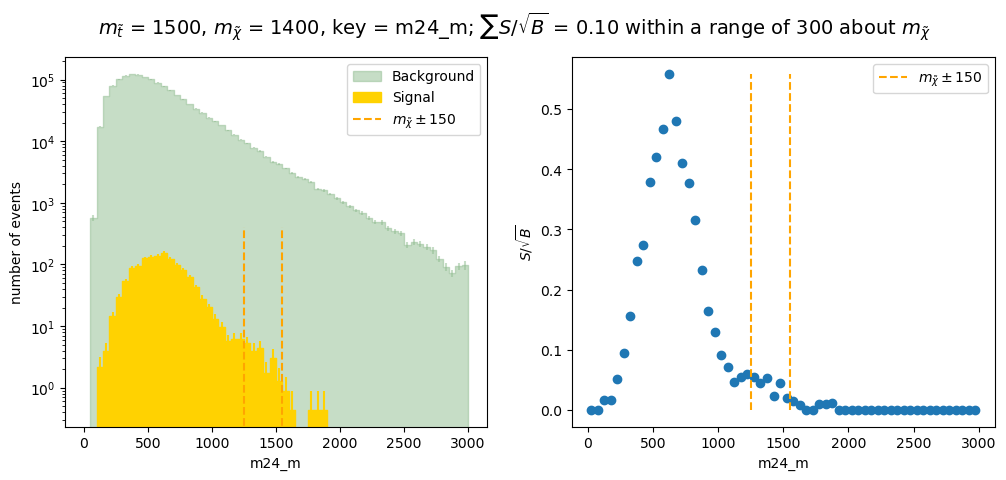

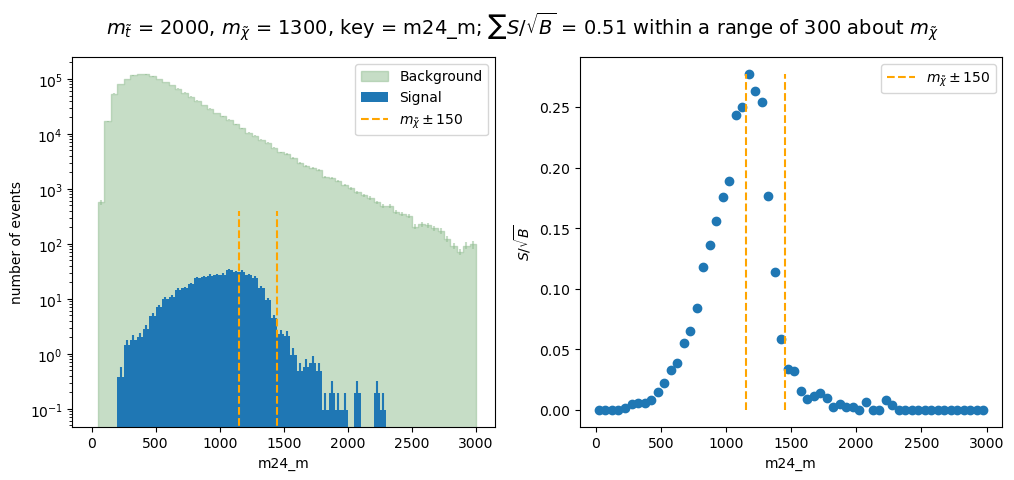

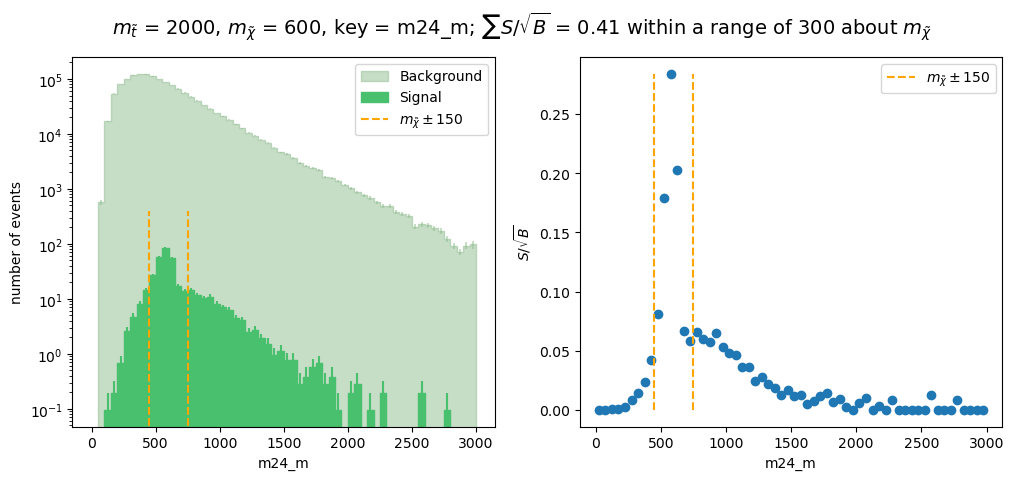

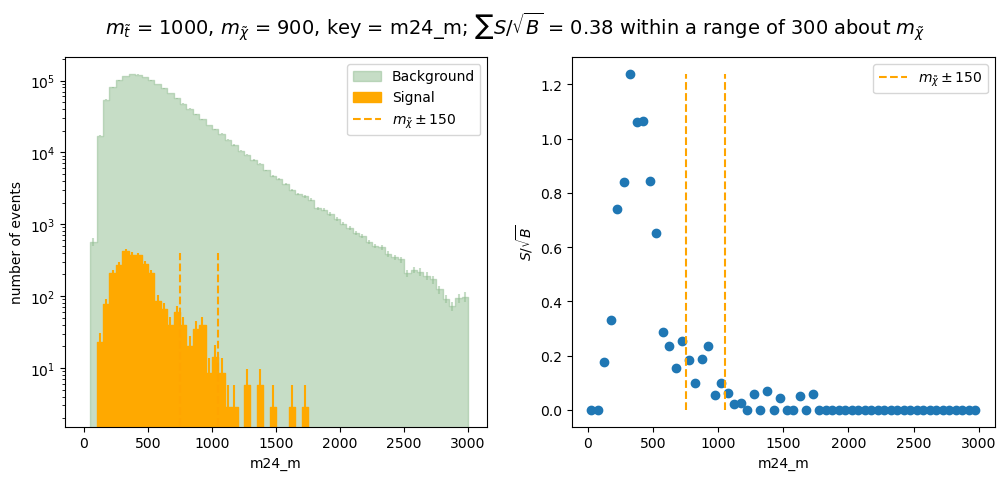

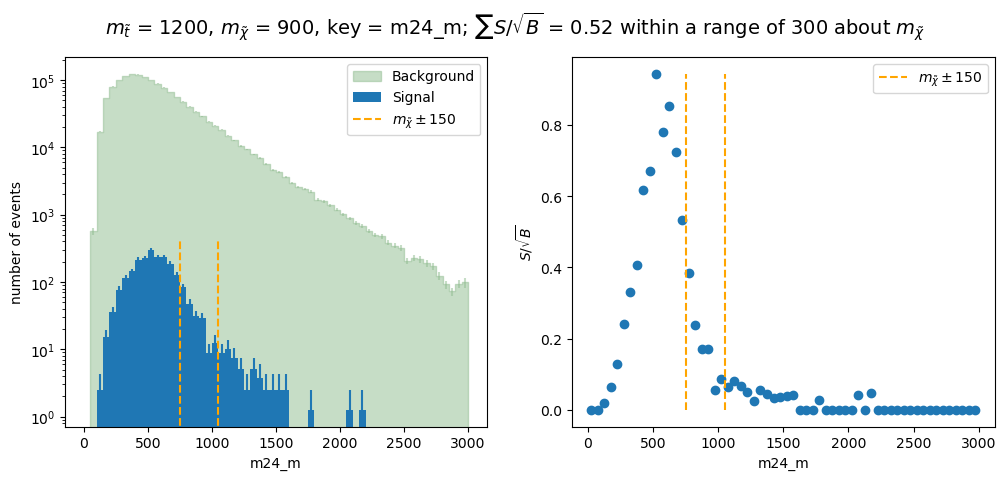

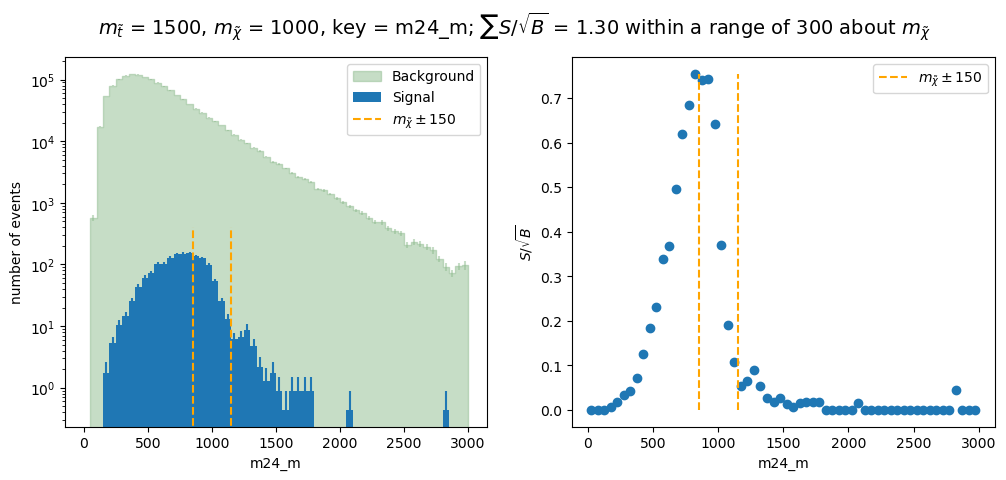

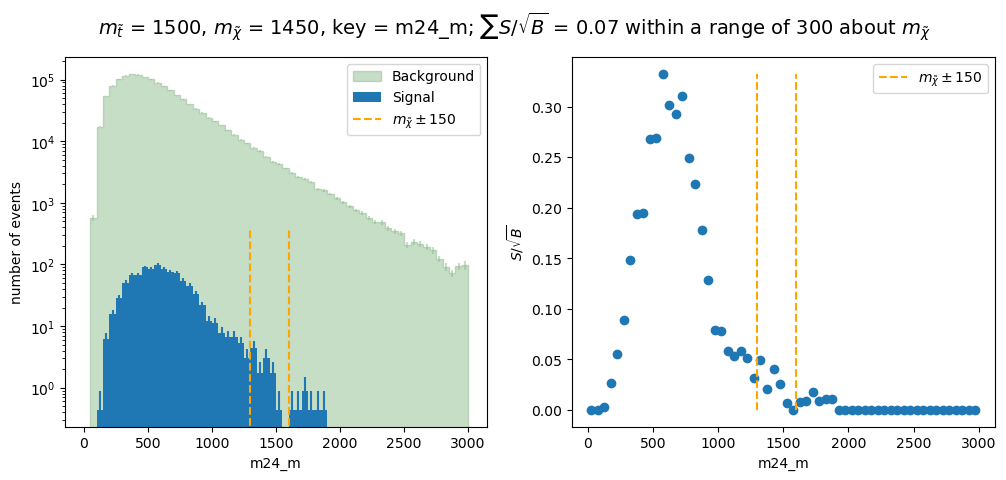

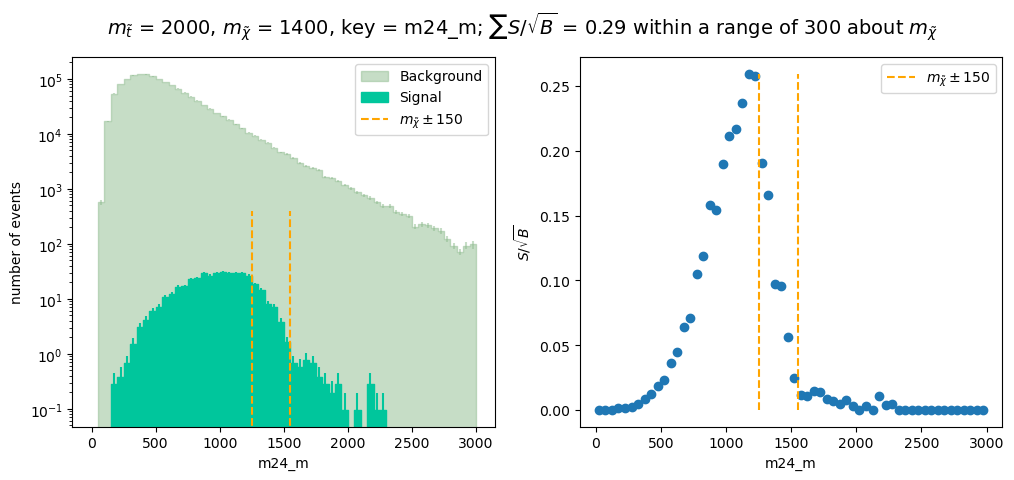

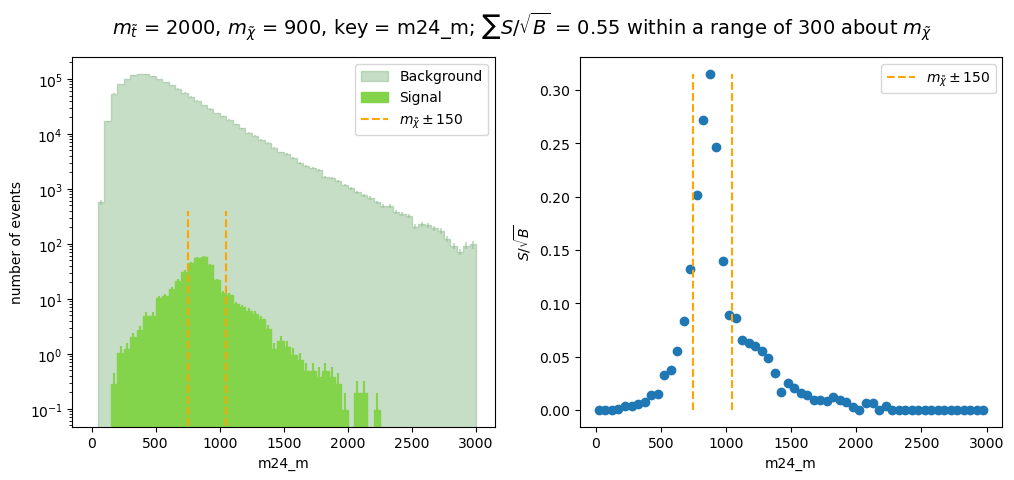

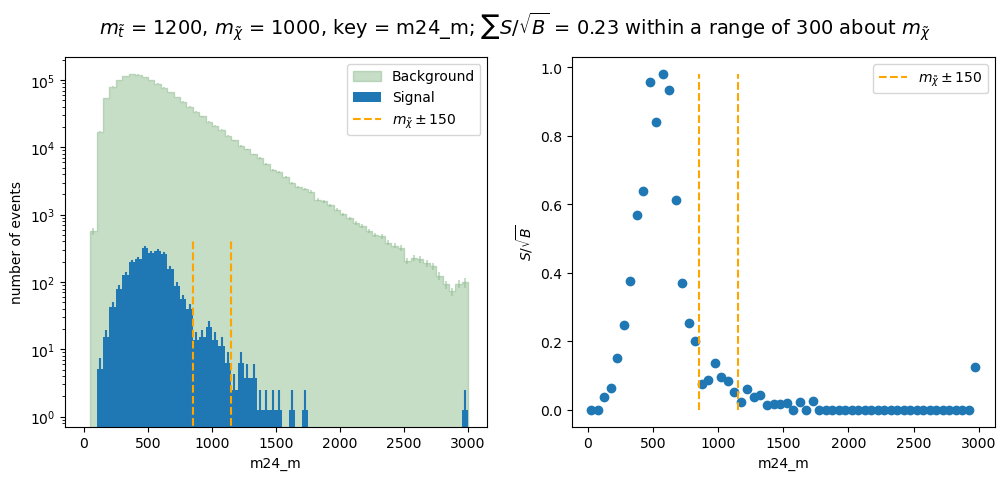

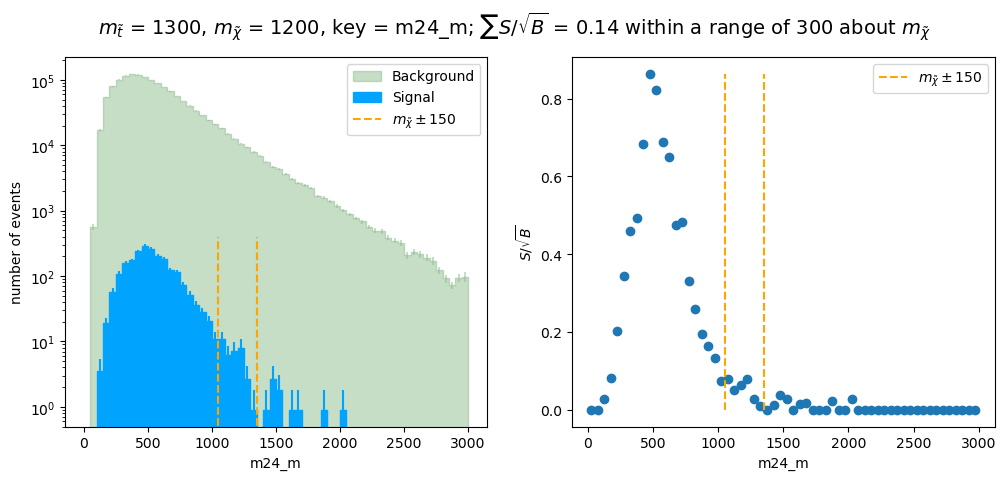

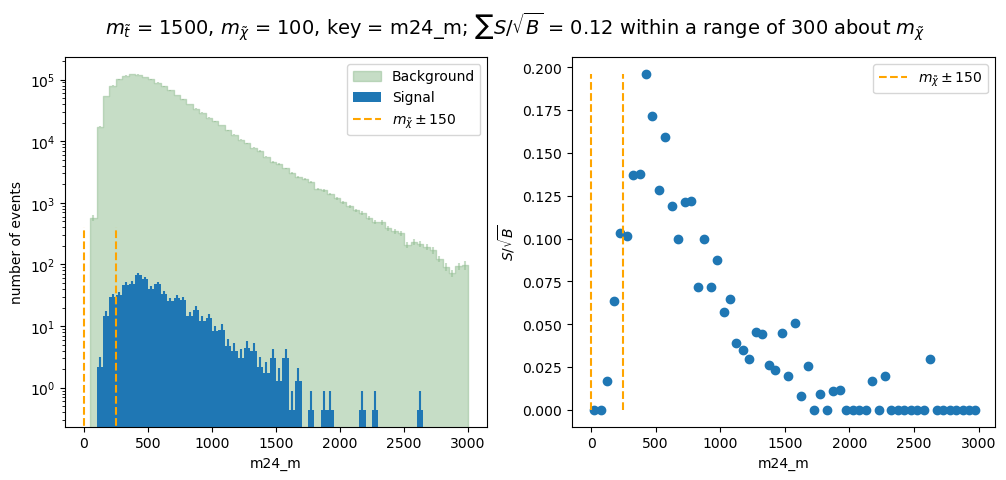

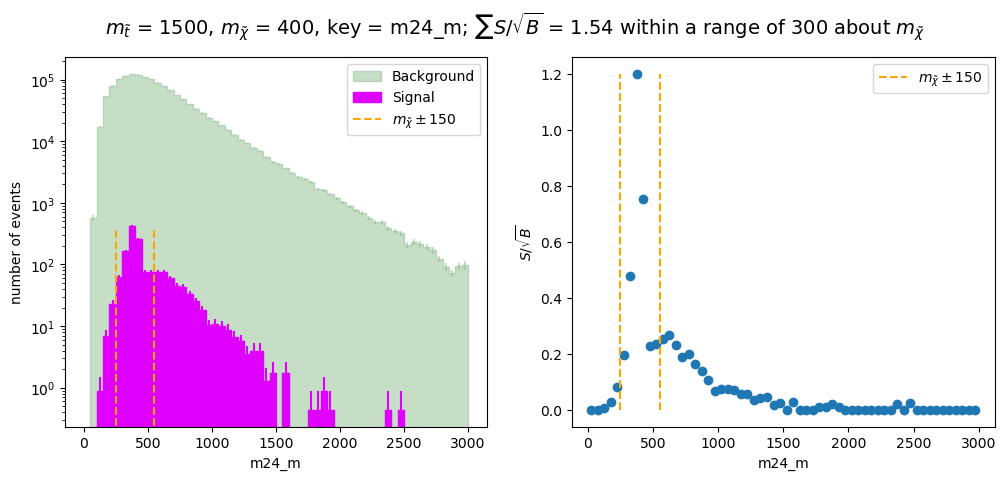

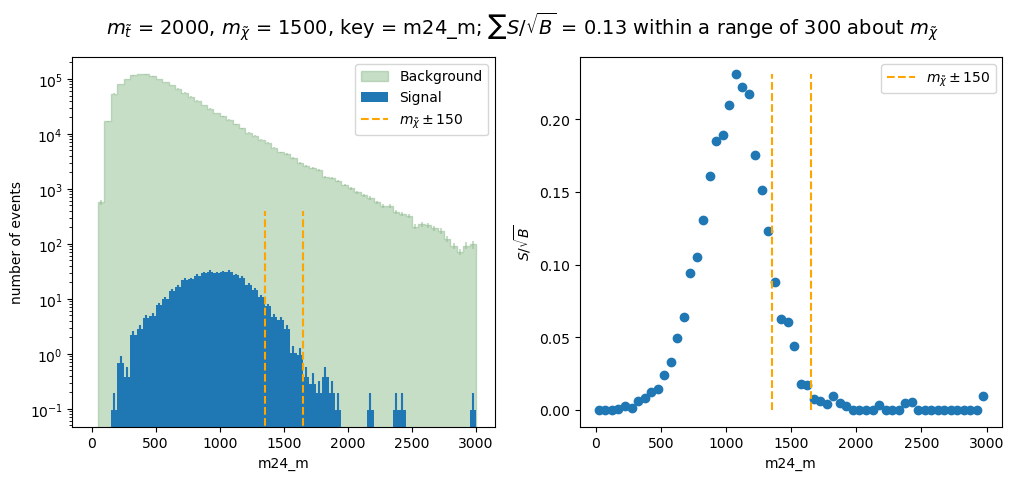

In [10]:
xvar = 'm24_m'
for signal in SIGNAL_NAMES:
    hists = a.results[signal].getScaledHistograms(s, None)
    signal_name_parts = signal.split('_')
    true_mtop = int(signal_name_parts[-2])
    true_mchi = int(signal_name_parts[-1])

    # if mchi/mtop >~ 0.7, we're in the compressed signal region
    s_over_root_b, bin_centers, points = pq.s_over_root_b(hists, bg_hists, xvar, true_mchi, sum_range_width)

    m24_m_points.append([true_mtop, true_mchi, s_over_root_b])

    signal_style = s.getSet(signal).style
    signal_obj = PlotObject.fromHist(hists[xvar], style=signal_style, title='Signal')
    background_obj = PlotObject.fromHist(bg_hists[xvar], style=background_style, title='Background')

    fig, ax = plt.subplots(1, 2)
    fig.suptitle(f"$m_\\tilde{{t}}$ = {true_mtop}, $m_\\tilde{{\chi}}$ = {true_mchi}, key = {xvar}; $\sum S/\sqrt{{B}}$ = {s_over_root_b:.2f} within a range of {sum_range_width} about $m_\\tilde{{\chi}}$", fontsize=14)
    fig.set_figwidth(12)
    ax[0].set_xlabel(xvar)
    ax[0].set_ylabel("number of events")
    ax[0].set_yscale("log")
    ax[1].set_xlabel(xvar)
    ax[1].set_ylabel("$S/\sqrt{B}$")
    # ax.set_title("Scatter plot of S/sqrt(B)")
    drawAs1DHist(ax[0], background_obj)
    drawAs1DHist(ax[0], signal_obj)
    ax[0].vlines([max(0, true_mchi-sum_range_width/2), true_mchi+sum_range_width/2], 0, 1000, colors='orange', linestyles='dashed', label=f'$m_{{\\tilde{{\chi}}}} \pm {round(sum_range_width/2)}$')
    ax[1].vlines([max(0, true_mchi-sum_range_width/2), true_mchi+sum_range_width/2], 0, max(points), colors='orange', linestyles='dashed', label=f'$m_{{\\tilde{{\chi}}}} \pm {round(sum_range_width/2)}$')
    ax[1].scatter(bin_centers, points)
    ax[0].legend()
    ax[1].legend()
    # print(f"m_t = {true_mtop}, m_chi = {true_mchi}, s/sqrt(b) summed in quadrature around m_chi = {s_over_root_b}")


/srv/peakquality.py:21: RuntimeWarning: invalid value encountered in divide
  s_over_root_b_points = np.nan_to_num(signal_data/sqrt_b)
/tmp/ipykernel_1366222/3699100515.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 2)


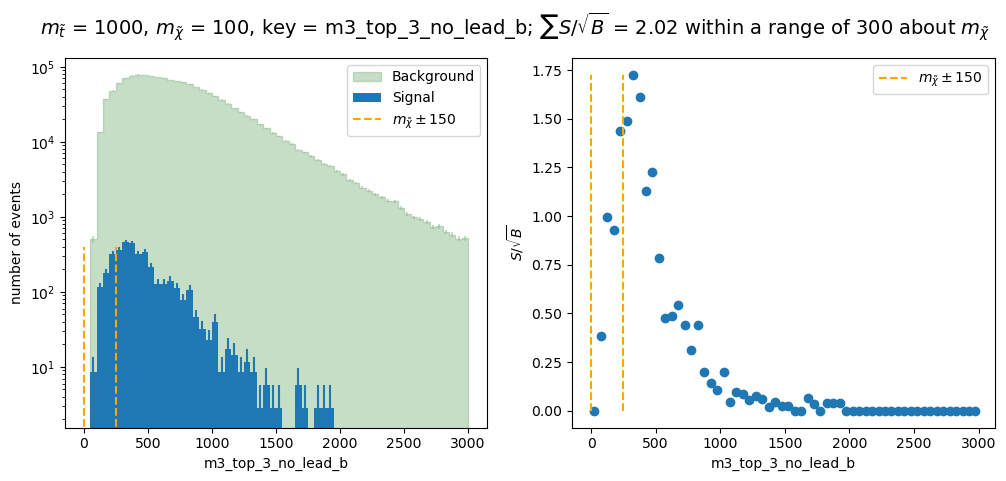

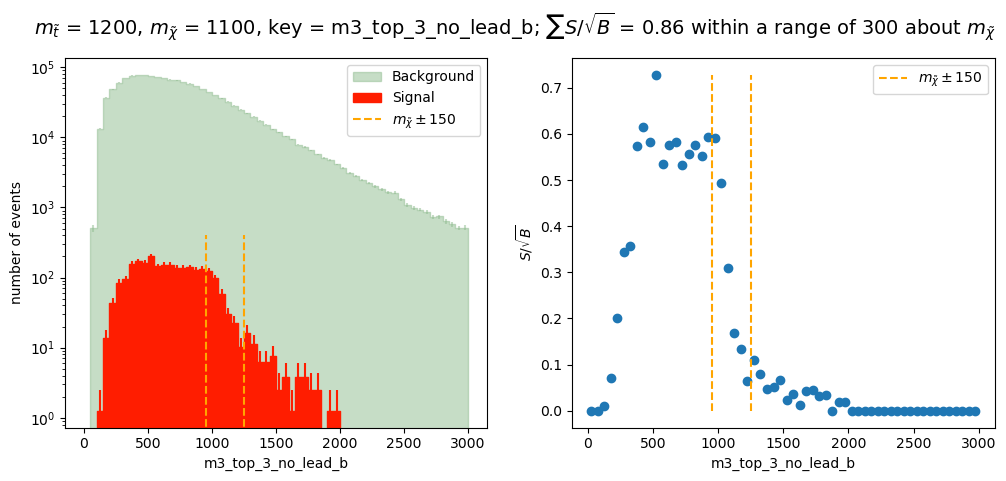

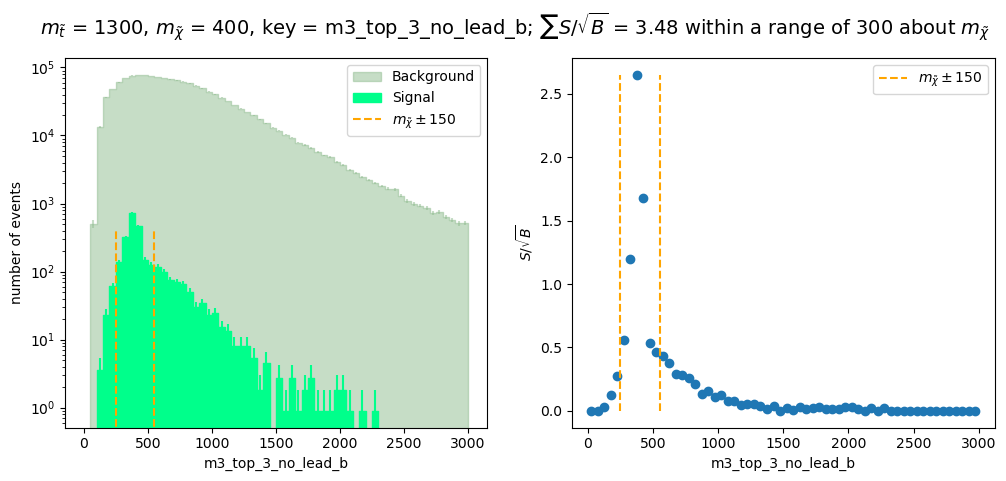

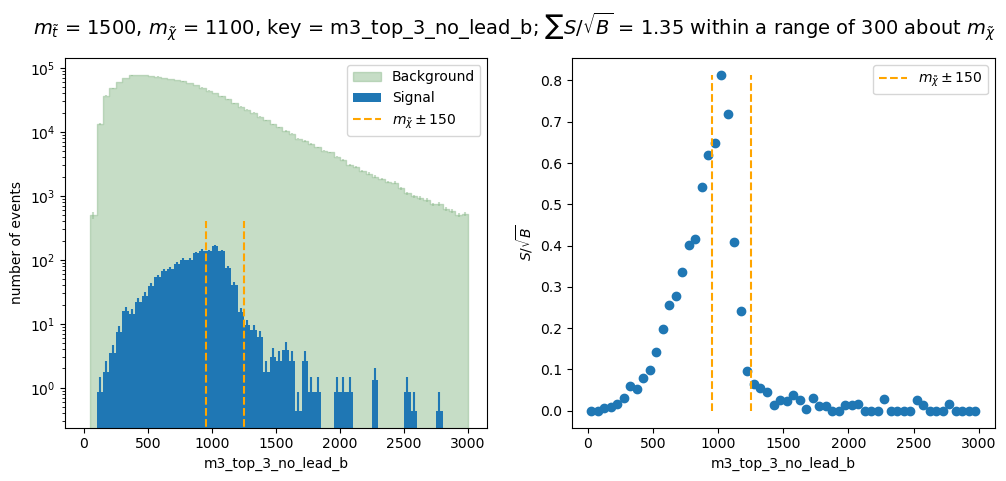

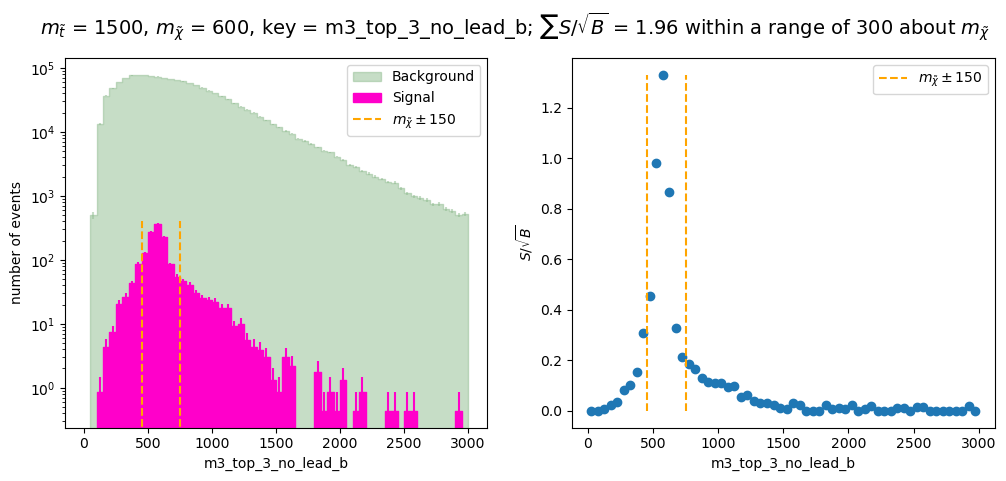

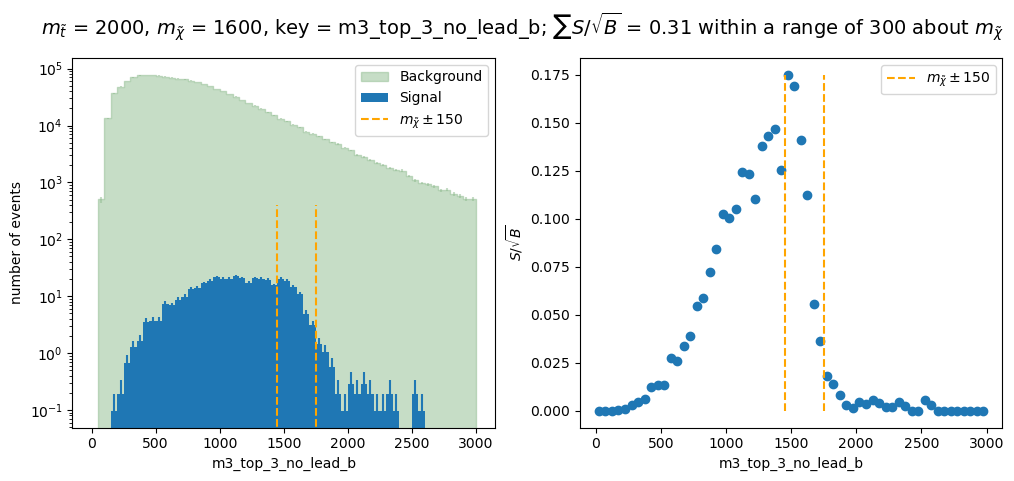

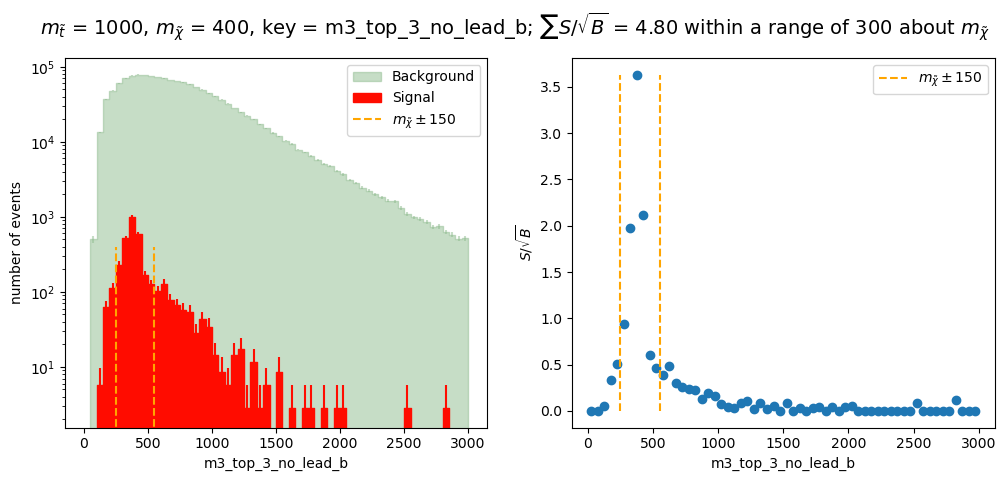

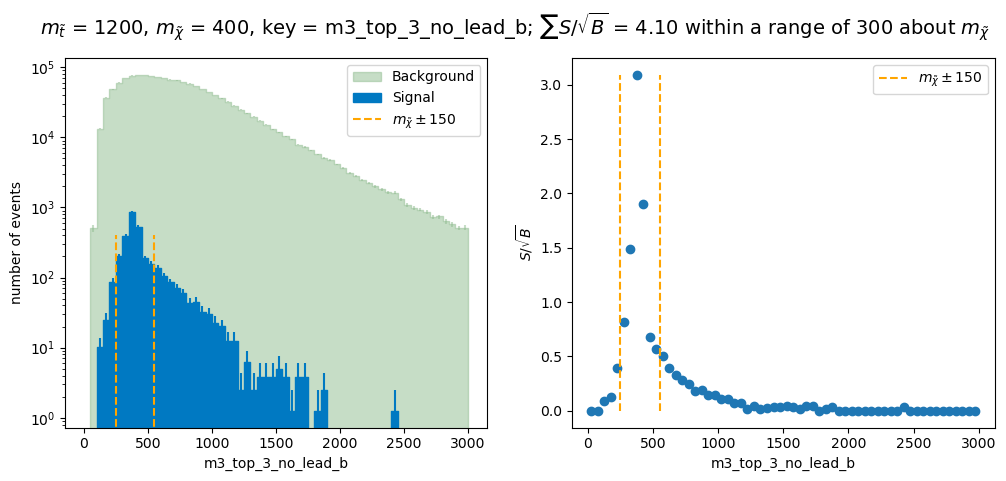

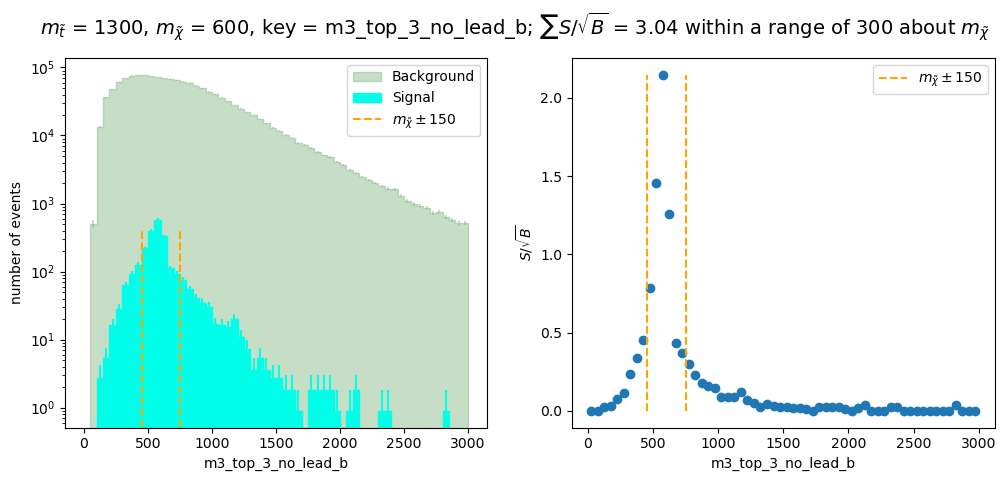

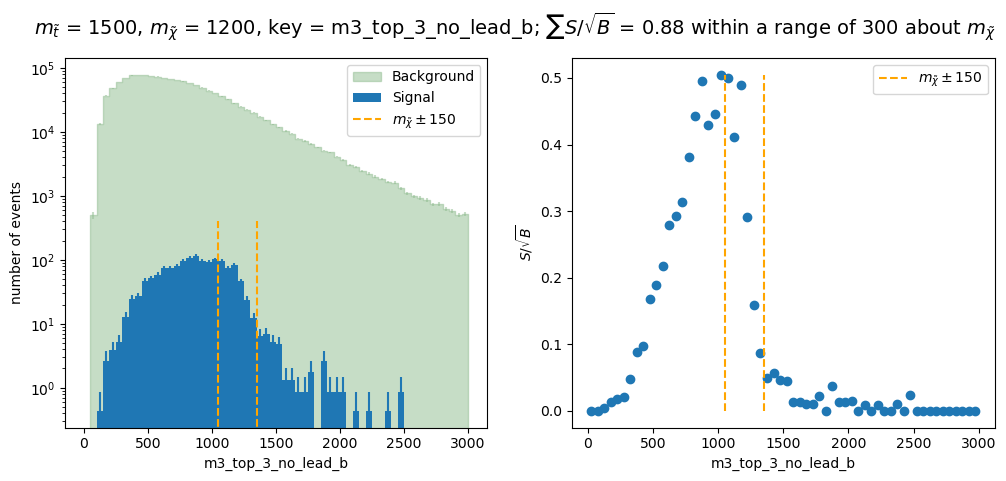

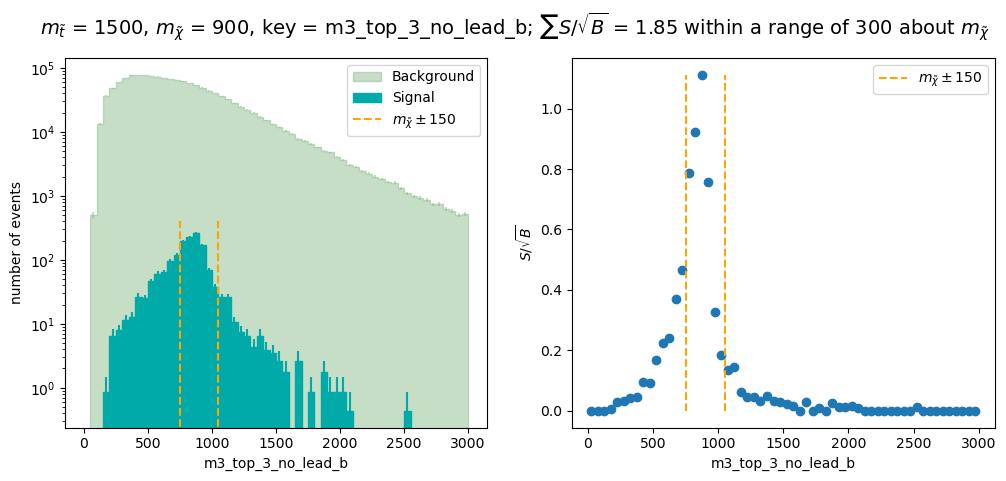

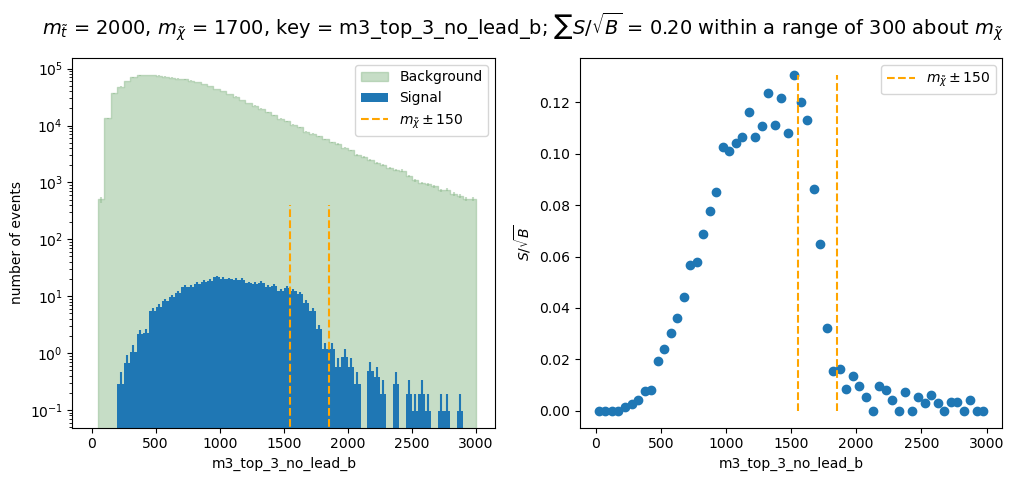

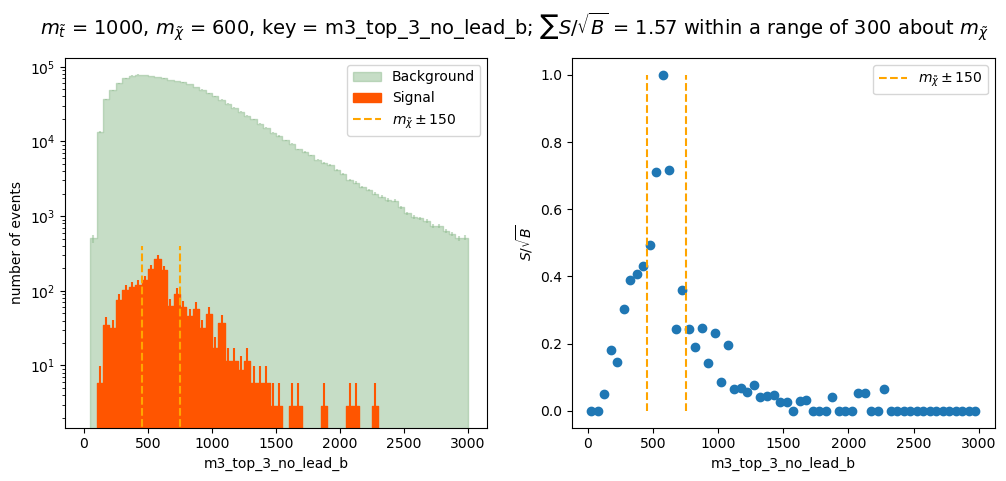

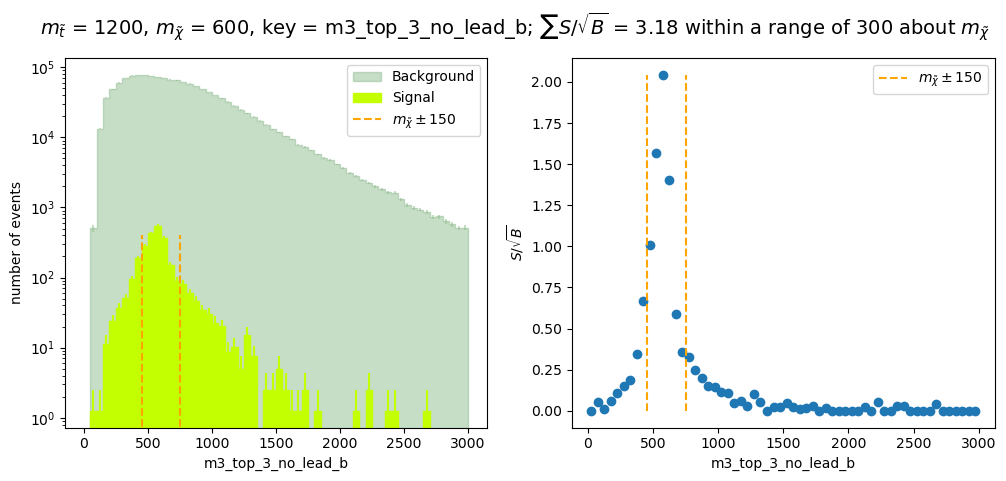

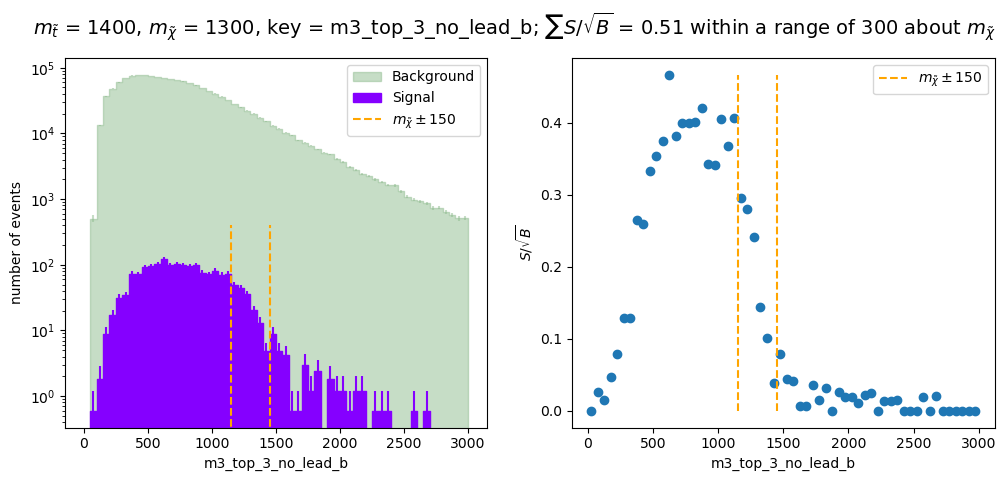

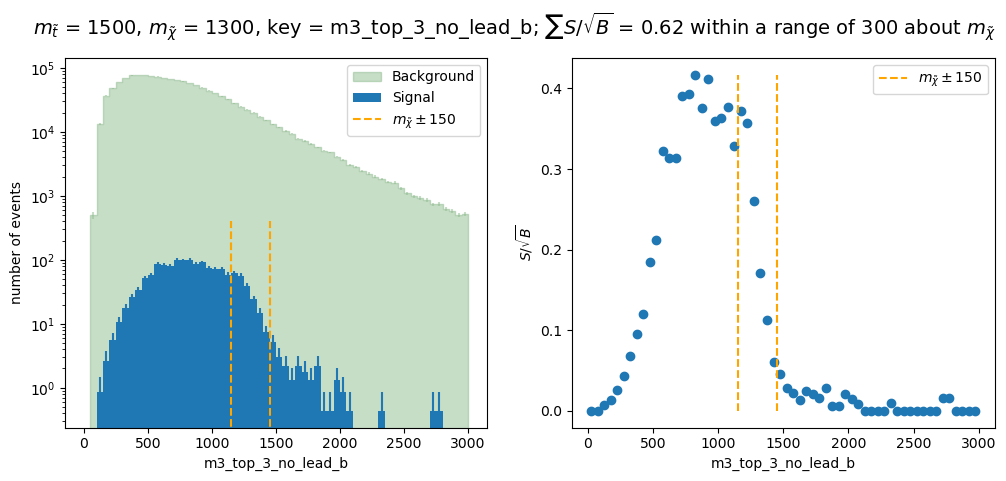

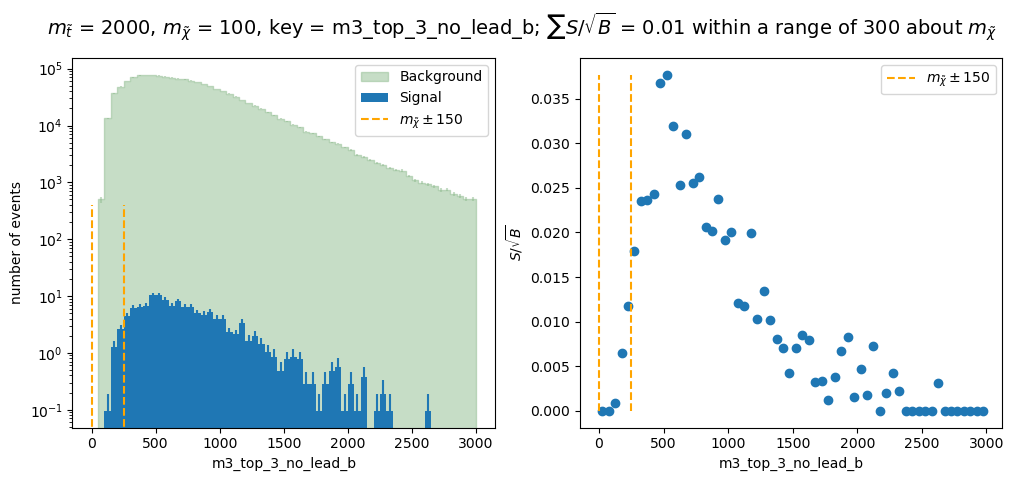

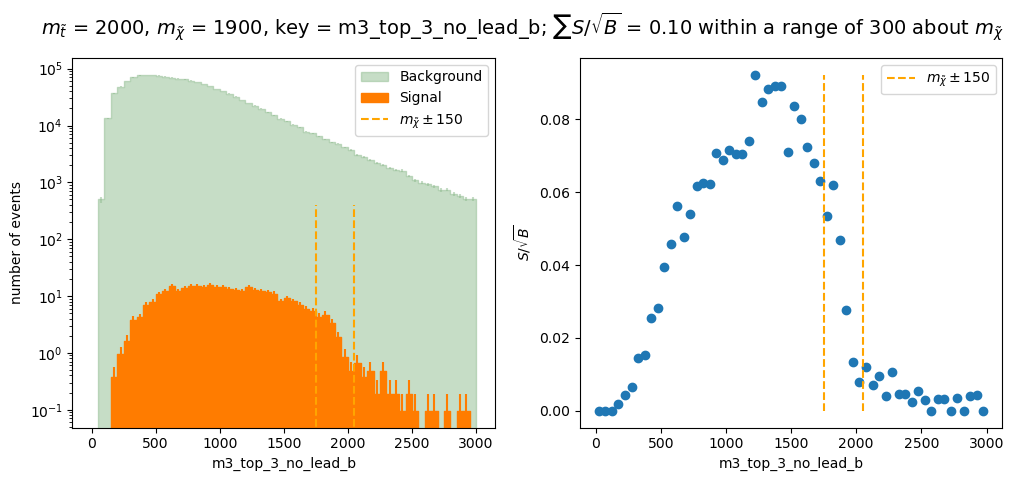

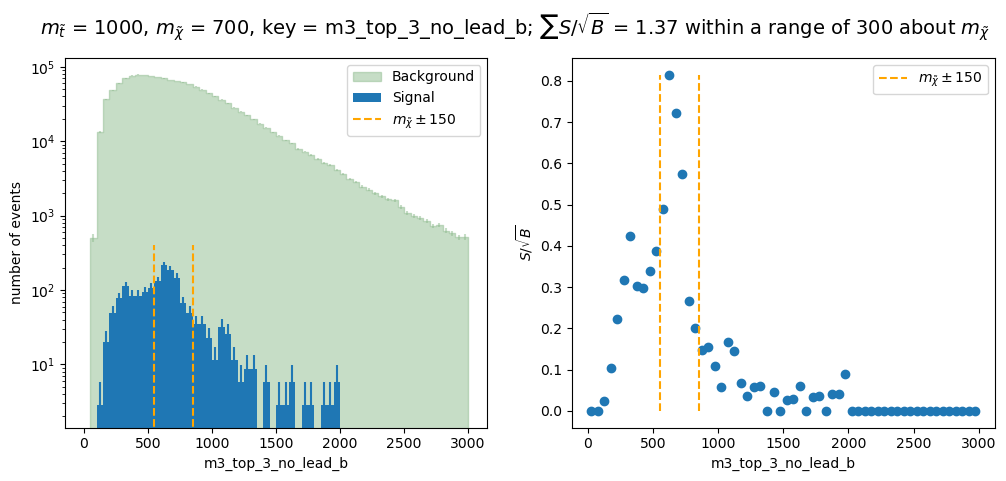

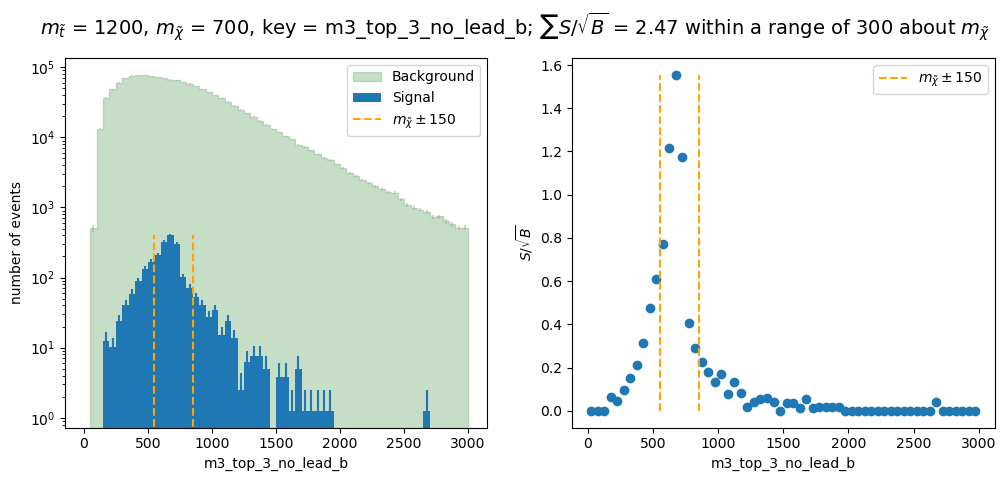

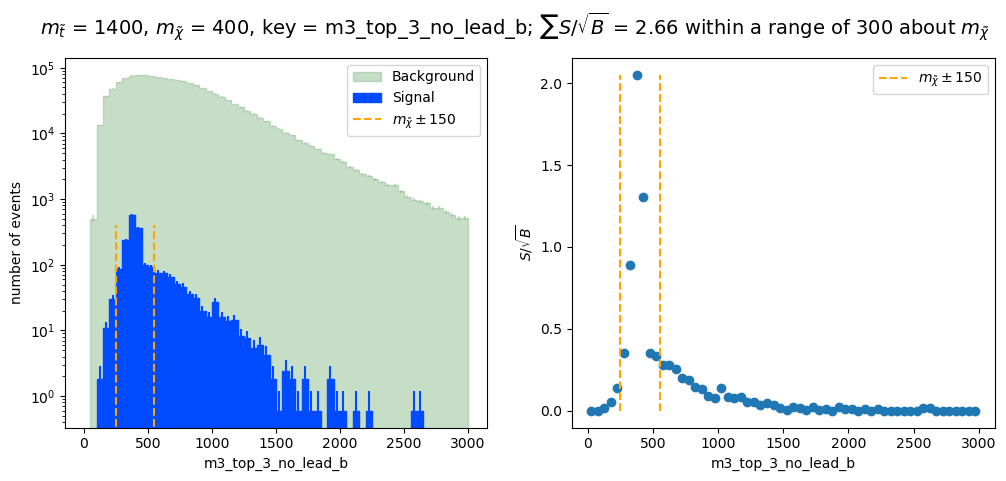

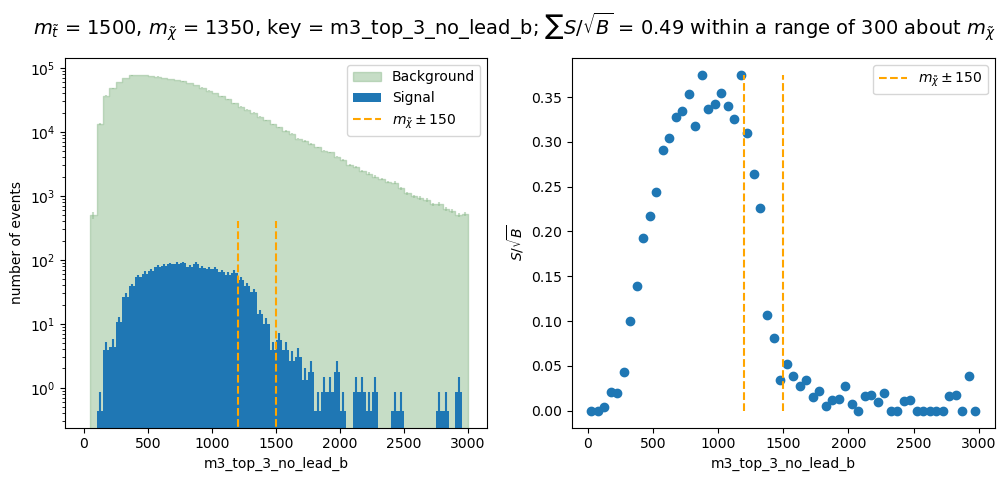

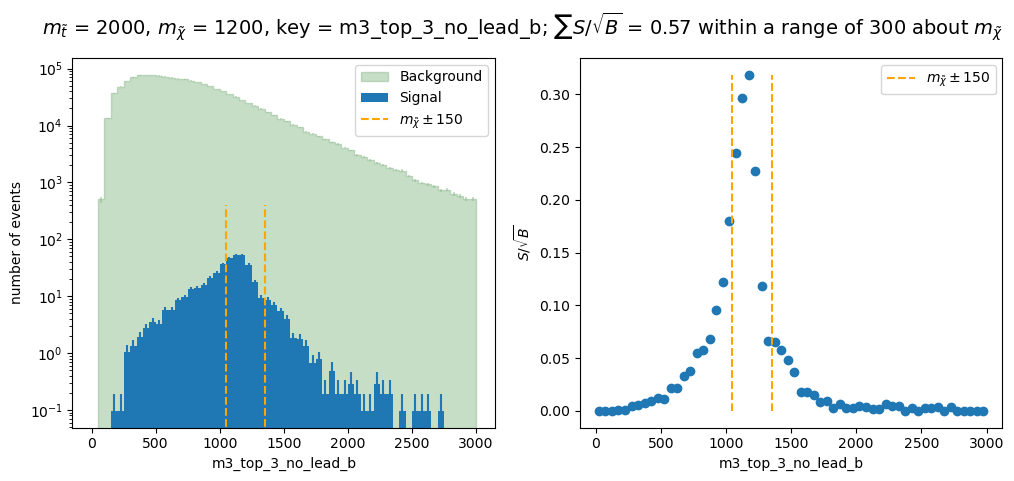

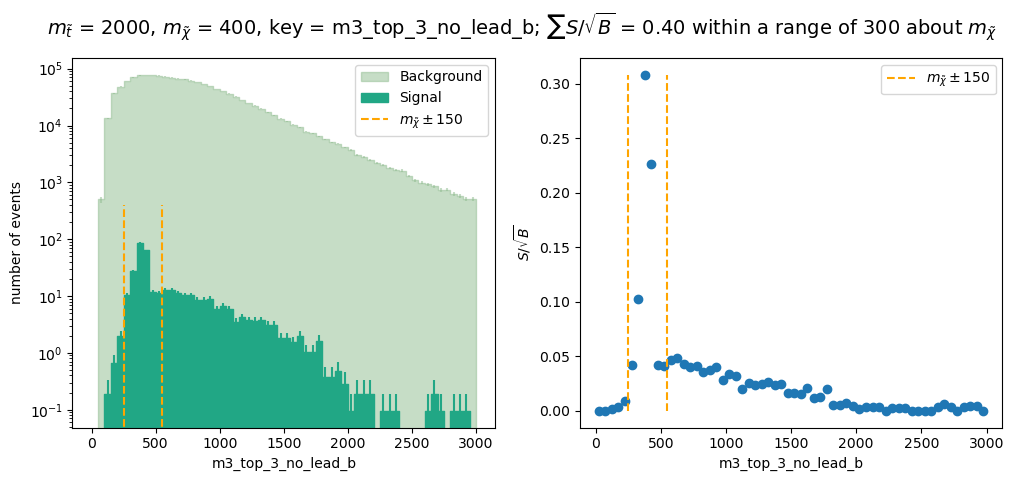

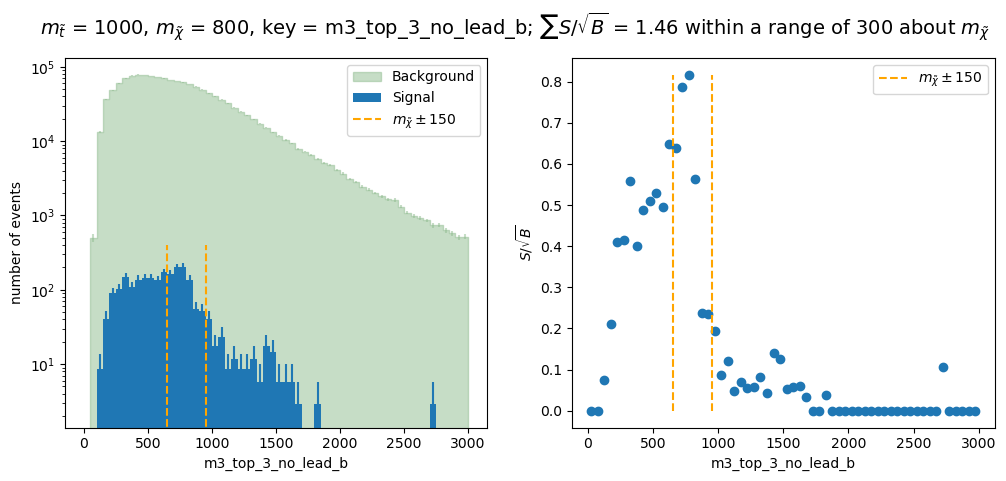

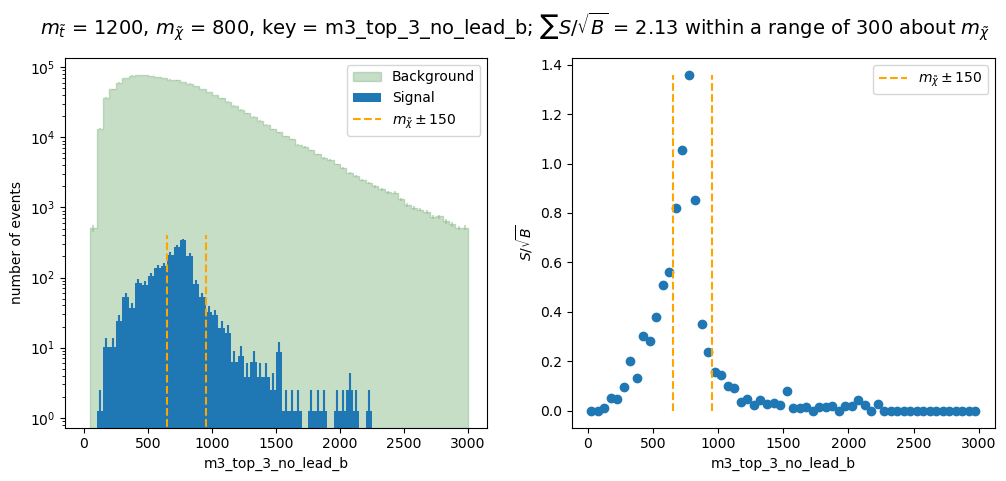

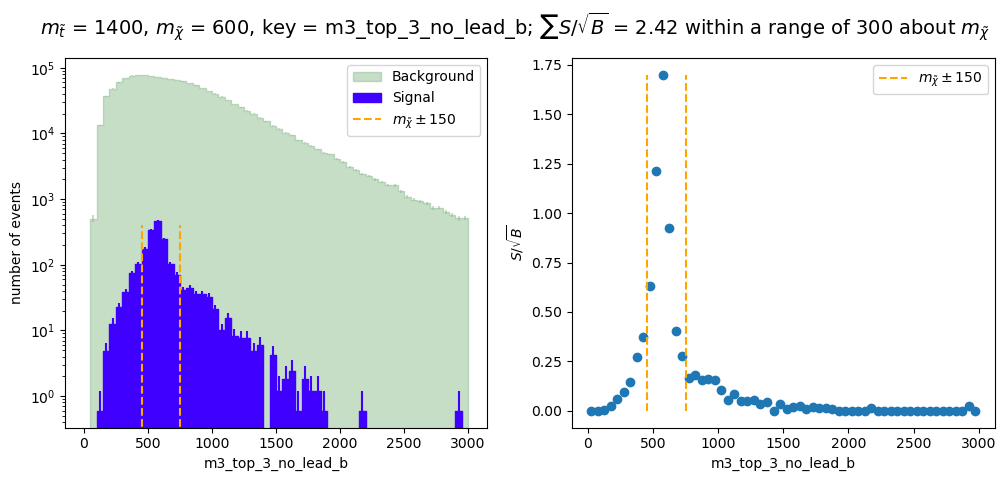

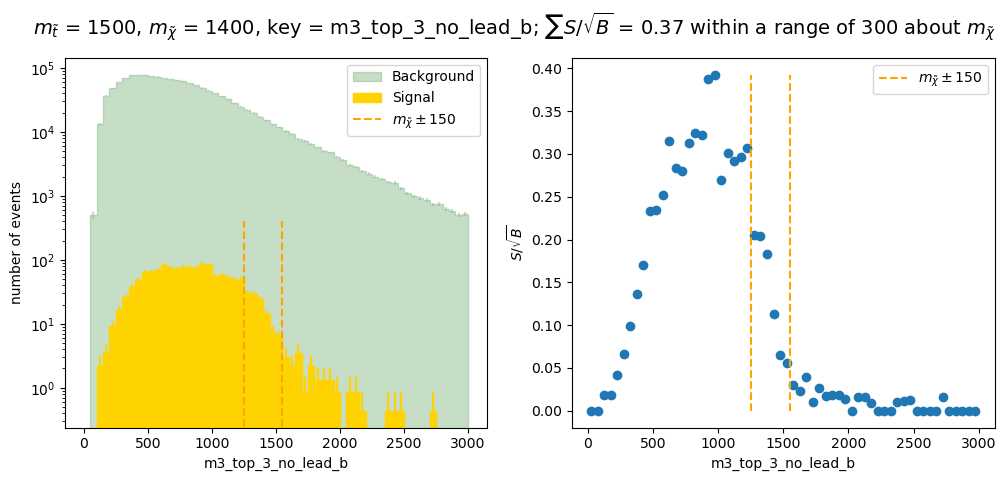

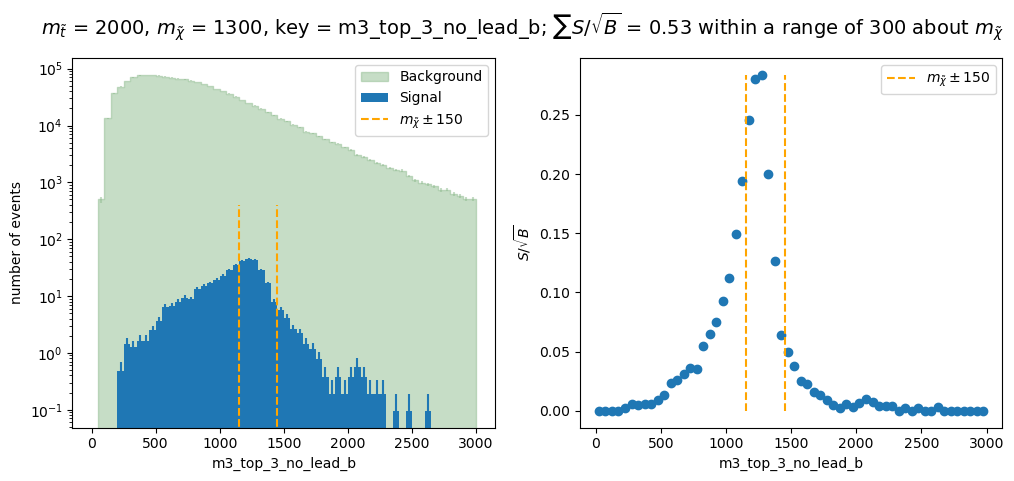

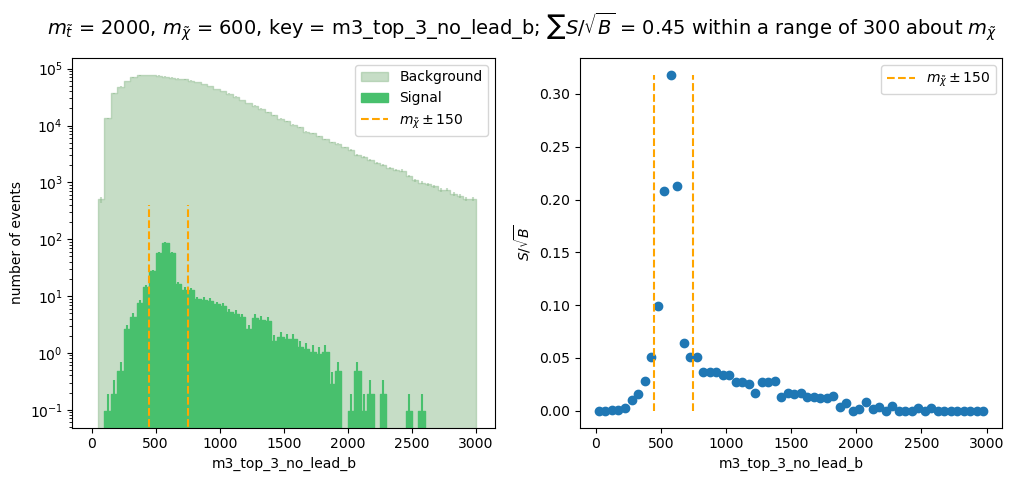

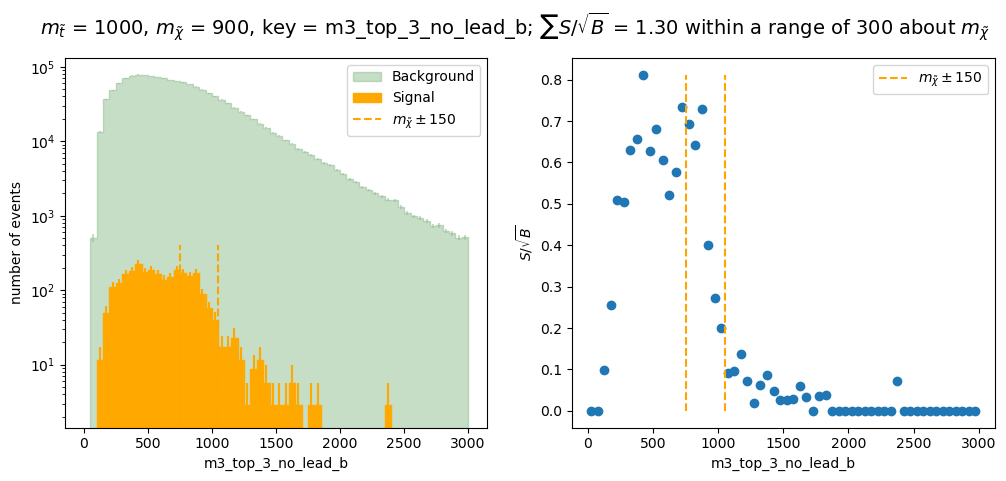

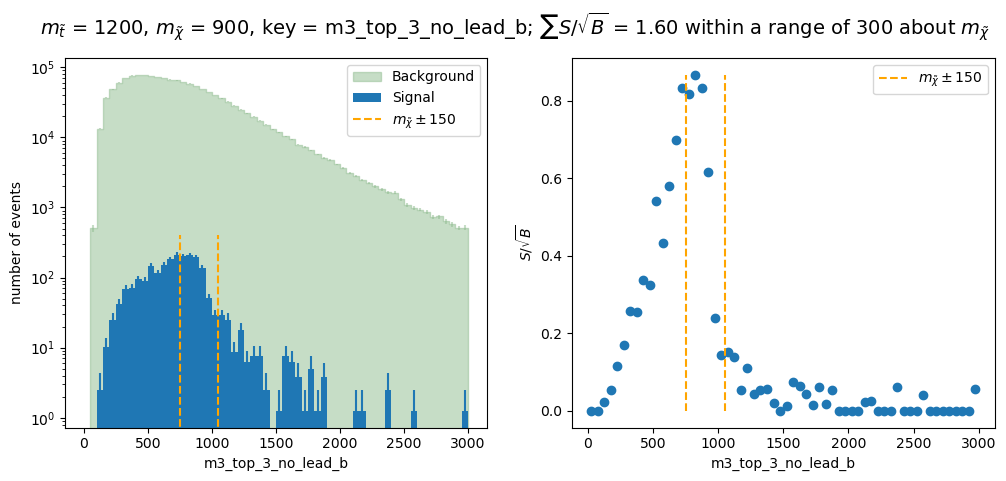

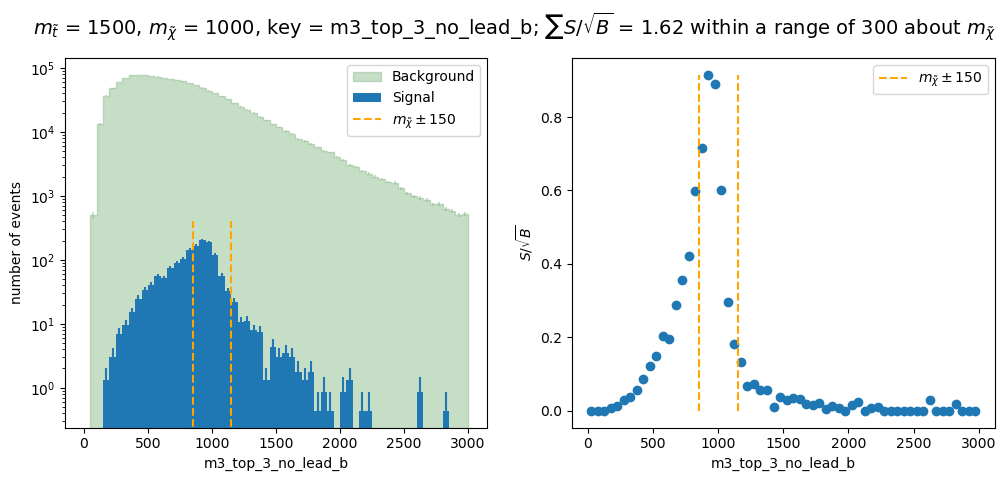

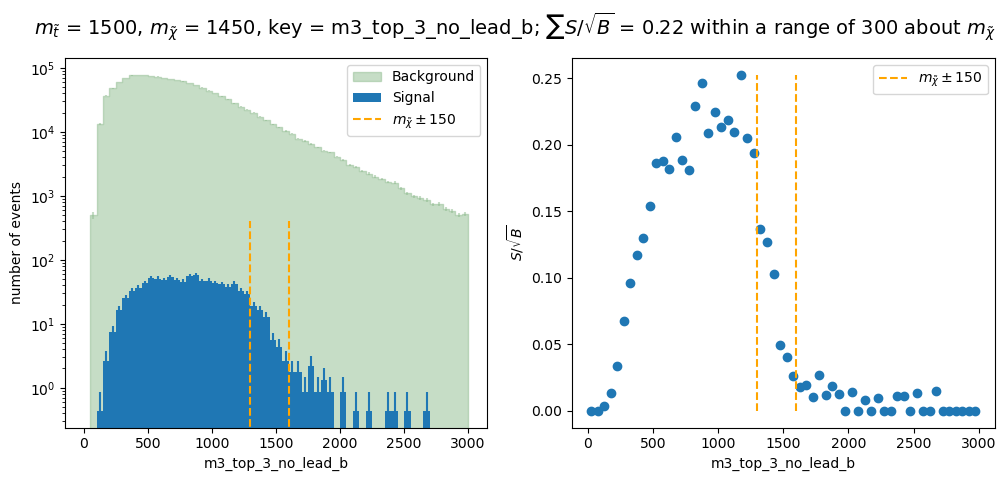

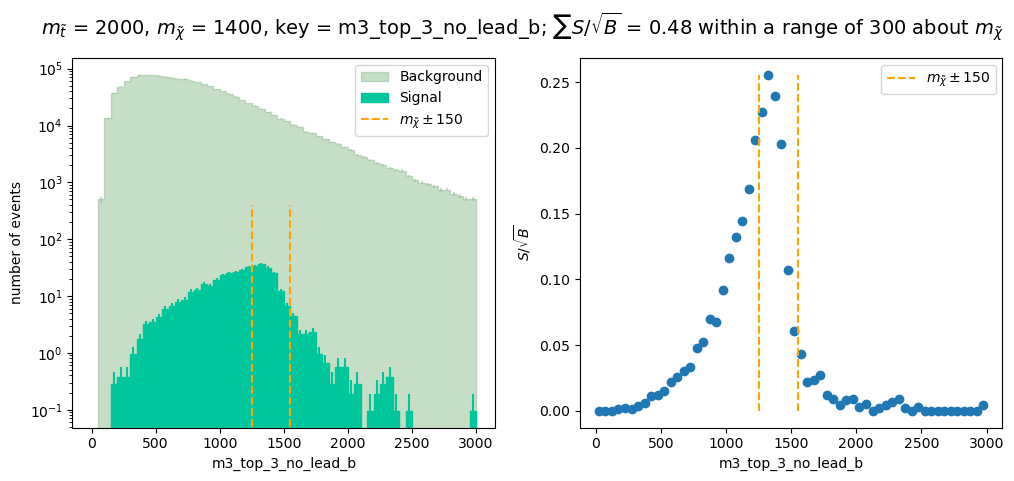

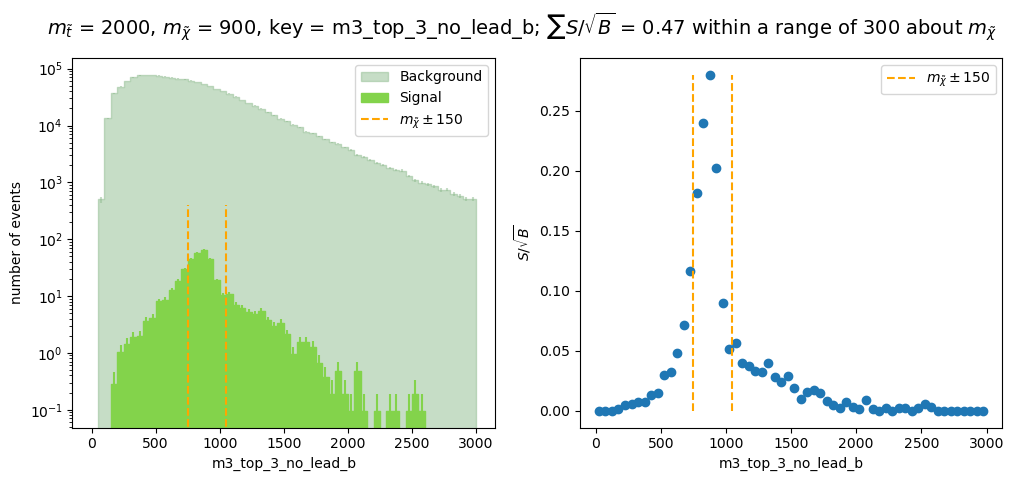

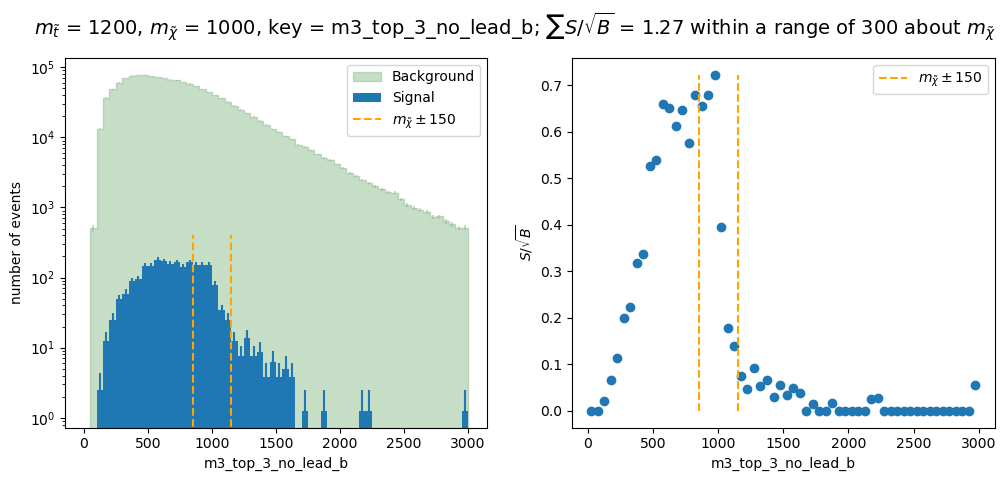

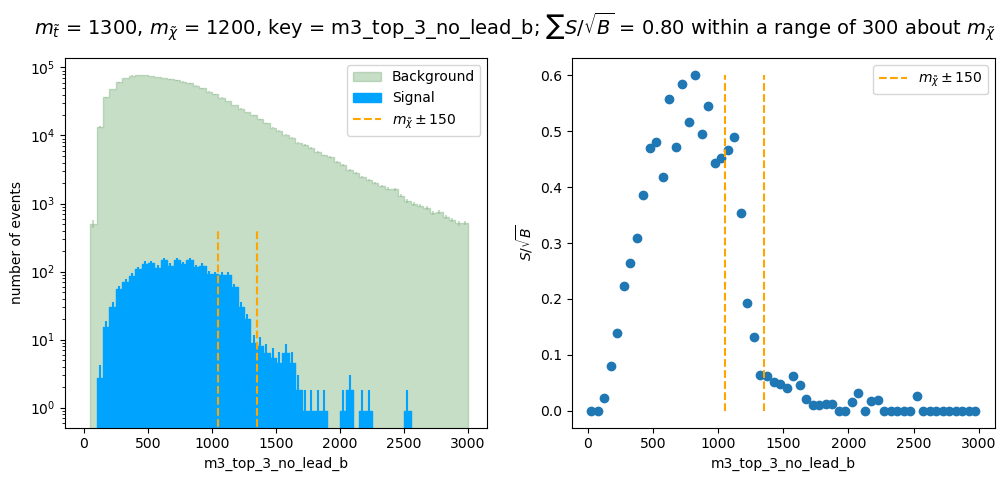

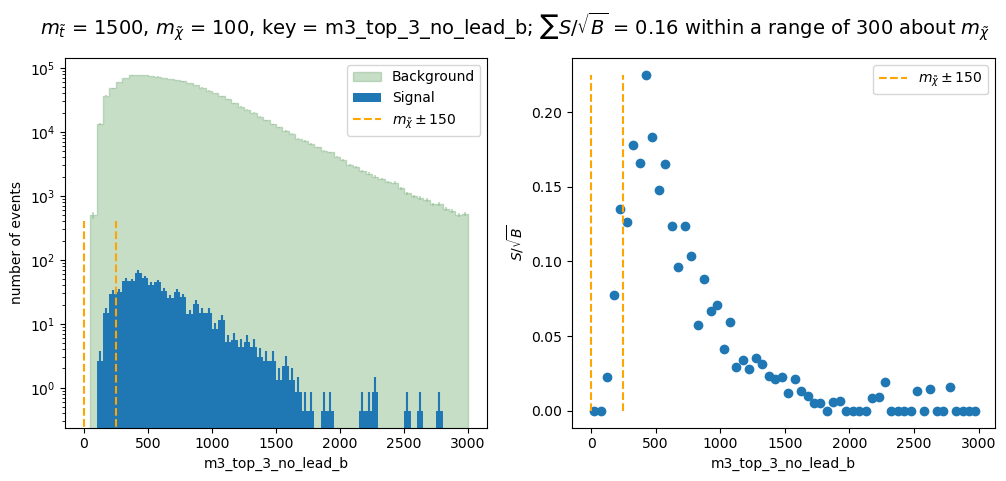

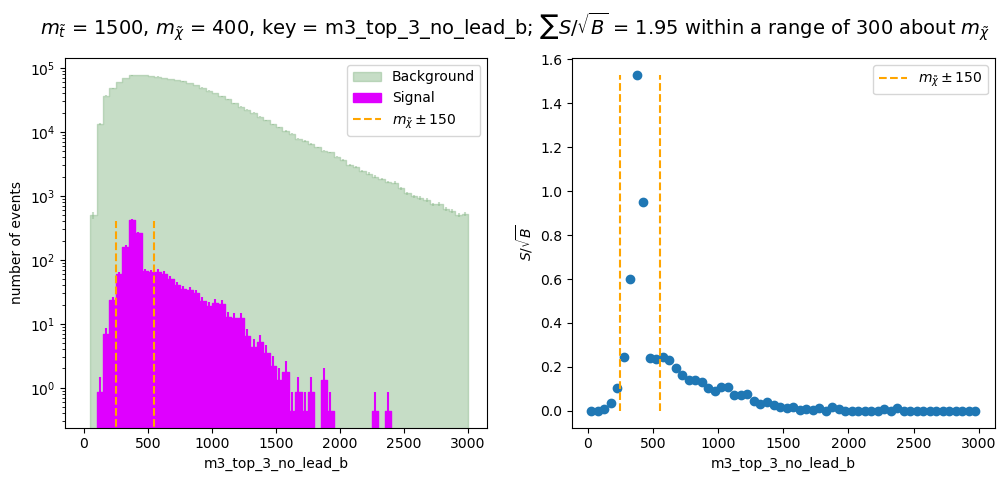

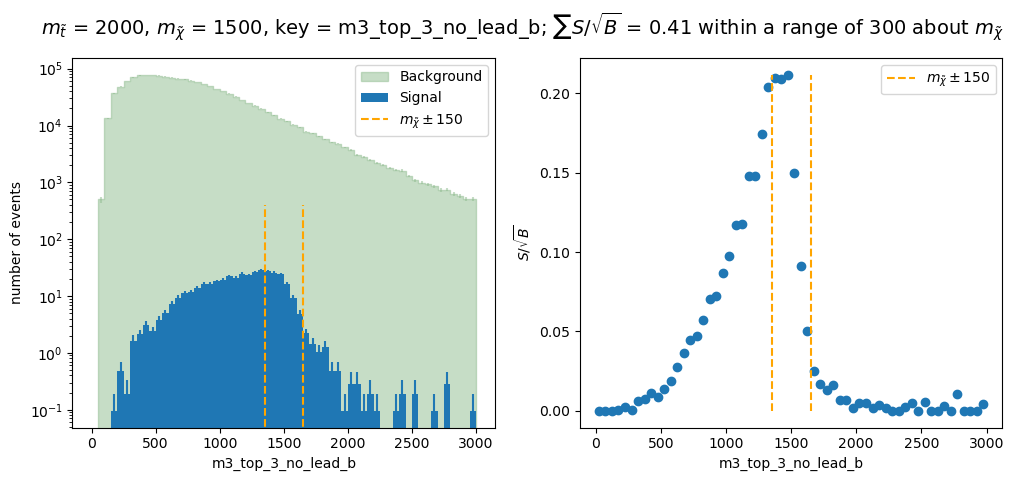

In [11]:
xvar = 'm3_top_3_no_lead_b'
for signal in SIGNAL_NAMES:
    hists = a.results[signal].getScaledHistograms(s, None)
    signal_name_parts = signal.split('_')
    true_mtop = int(signal_name_parts[-2])
    true_mchi = int(signal_name_parts[-1])

    # if mchi/mtop >~ 0.7, we're in the compressed signal region
    s_over_root_b, bin_centers, points = pq.s_over_root_b(hists, bg_hists, xvar, true_mchi, sum_range_width)

    m3_top_3_no_lead_b_points.append([true_mtop, true_mchi, s_over_root_b])

    signal_style = s.getSet(signal).style
    signal_obj = PlotObject.fromHist(hists[xvar], style=signal_style, title='Signal')
    background_obj = PlotObject.fromHist(bg_hists[xvar], style=background_style, title='Background')

    fig, ax = plt.subplots(1, 2)
    fig.suptitle(f"$m_\\tilde{{t}}$ = {true_mtop}, $m_\\tilde{{\chi}}$ = {true_mchi}, key = {xvar}; $\sum S/\sqrt{{B}}$ = {s_over_root_b:.2f} within a range of {sum_range_width} about $m_\\tilde{{\chi}}$", fontsize=14)
    fig.set_figwidth(12)
    ax[0].set_xlabel(xvar)
    ax[0].set_ylabel("number of events")
    ax[0].set_yscale("log")
    ax[1].set_xlabel(xvar)
    ax[1].set_ylabel("$S/\sqrt{B}$")
    # ax.set_title("Scatter plot of S/sqrt(B)")
    drawAs1DHist(ax[0], background_obj)
    drawAs1DHist(ax[0], signal_obj)
    ax[0].vlines([max(0, true_mchi-sum_range_width/2), true_mchi+sum_range_width/2], 0, 1000, colors='orange', linestyles='dashed', label=f'$m_{{\\tilde{{\chi}}}} \pm {round(sum_range_width/2)}$')
    ax[1].vlines([max(0, true_mchi-sum_range_width/2), true_mchi+sum_range_width/2], 0, max(points), colors='orange', linestyles='dashed', label=f'$m_{{\\tilde{{\chi}}}} \pm {round(sum_range_width/2)}$')
    ax[1].scatter(bin_centers, points)
    ax[0].legend()
    ax[1].legend()
    # print(f"m_t = {true_mtop}, m_chi = {true_mchi}, s/sqrt(b) summed in quadrature around m_chi = {s_over_root_b}")

In [32]:
m13_m_points = np.array(m13_m_points)
m24_m_points = np.array(m24_m_points)
m3_top_3_no_lead_b_points = np.array(m3_top_3_no_lead_b_points)

In [89]:
m13_m_good_points = m13_m_points[m13_m_points[:, 2] >= 1]
m13_m_bad_points = m13_m_points[m13_m_points[:, 2] < 1]
m24_m_good_points = m24_m_points[m24_m_points[:, 2] >= 1]
m24_m_bad_points = m24_m_points[m24_m_points[:, 2] < 1]
m3_top_3_no_lead_b_good_points = m3_top_3_no_lead_b_points[m24_m_points[:, 2] >= 1]
m3_top_3_no_lead_b_bad_points = m3_top_3_no_lead_b_points[m24_m_points[:, 2] < 1]

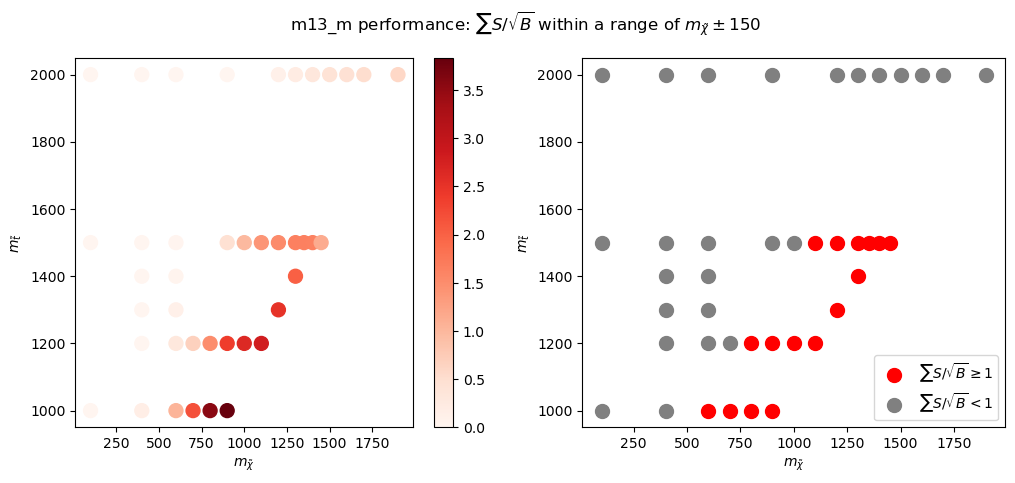

In [87]:
fig, ax = plt.subplots(1,2)
scatterplot = ax[0].scatter(m13_m_points[:, 1], m13_m_points[:, 0], c=[m13_m_points[:, 2]], s=100)
fig.set_figwidth(12)

ax[1].scatter(m13_m_good_points[:, 1], m13_m_good_points[:, 0], c='red', s=100, label='$\sum S/\sqrt{{B}} \\geq 1$')
ax[1].scatter(m13_m_bad_points[:, 1], m13_m_bad_points[:, 0], c='gray', s=100, label='$\sum S/\sqrt{{B}} < 1$')

plt.set_cmap("Reds")
plt.colorbar(scatterplot)
fig.suptitle(f"m13_m performance: $\sum S/\sqrt{{B}}$ within a range of $m_\\tilde{{\chi}} \\pm {sum_range_width//2}$")
ax[0].set_xlabel("$m_\\tilde{{\chi}}$")
ax[0].set_ylabel("$m_\\tilde{{t}}$")
ax[1].set_xlabel("$m_\\tilde{{\chi}}$")
ax[1].set_ylabel("$m_\\tilde{{t}}$")
ax[1].legend()
plt.show()

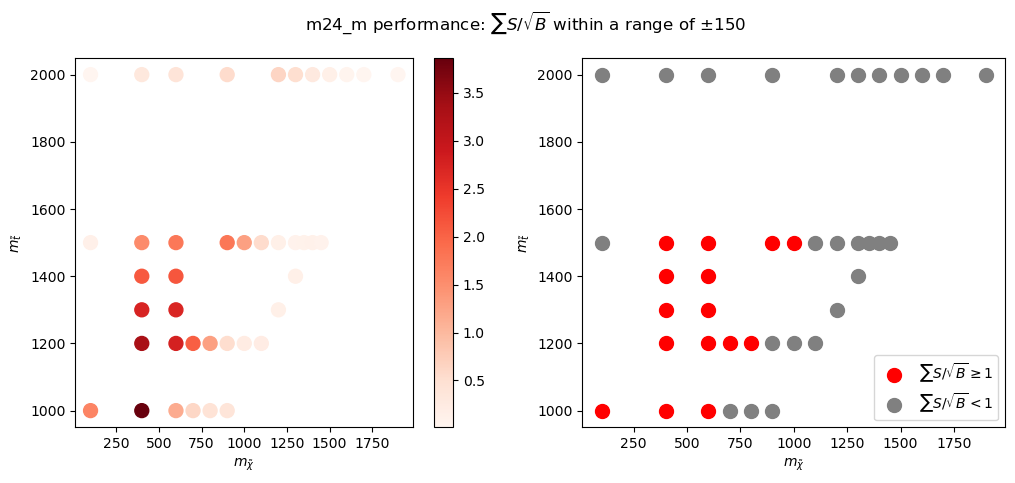

In [85]:
fig, ax = plt.subplots(1,2)
scatterplot = ax[0].scatter(m24_m_points[:, 1], m24_m_points[:, 0], c=[m24_m_points[:, 2]], s=100)
fig.set_figwidth(12)

ax[1].scatter(m24_m_good_points[:, 1], m24_m_good_points[:, 0], c='red', s=100, label='$\sum S/\sqrt{{B}} \\geq 1$')
ax[1].scatter(m24_m_bad_points[:, 1], m24_m_bad_points[:, 0], c='gray', s=100, label='$\sum S/\sqrt{{B}} < 1$')

plt.set_cmap("Reds")
plt.colorbar(scatterplot)
fig.suptitle(f"m24_m performance: $\sum S/\sqrt{{B}}$ within a range of $\\pm {sum_range_width//2}$")
ax[0].set_xlabel("$m_\\tilde{{\chi}}$")
ax[0].set_ylabel("$m_\\tilde{{t}}$")
ax[1].set_xlabel("$m_\\tilde{{\chi}}$")
ax[1].set_ylabel("$m_\\tilde{{t}}$")
ax[1].legend()
plt.show()

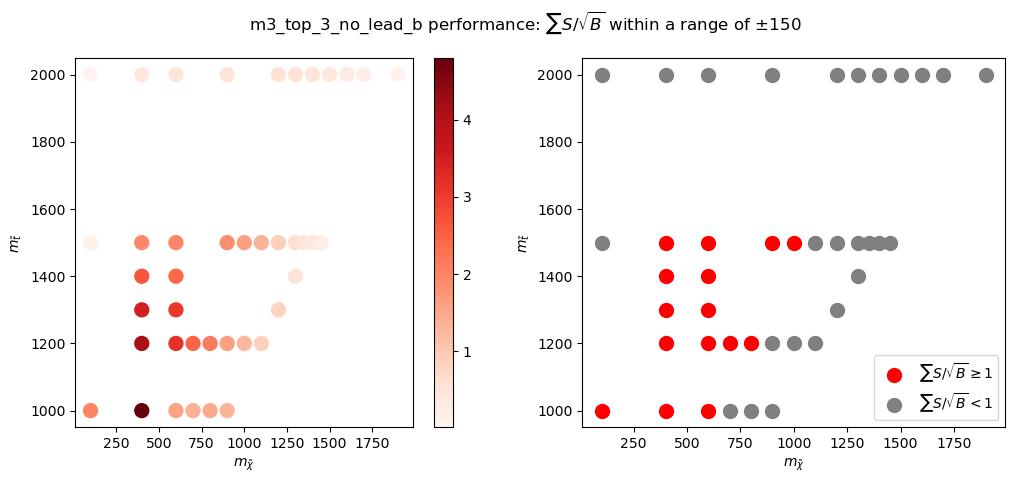

In [90]:
fig, ax = plt.subplots(1,2)
scatterplot = ax[0].scatter(m3_top_3_no_lead_b_points[:, 1], m3_top_3_no_lead_b_points[:, 0], c=[m3_top_3_no_lead_b_points[:, 2]], s=100)
fig.set_figwidth(12)

ax[1].scatter(m3_top_3_no_lead_b_good_points[:, 1], m3_top_3_no_lead_b_good_points[:, 0], c='red', s=100, label='$\sum S/\sqrt{{B}} \\geq 1$')
ax[1].scatter(m3_top_3_no_lead_b_bad_points[:, 1], m3_top_3_no_lead_b_bad_points[:, 0], c='gray', s=100, label='$\sum S/\sqrt{{B}} < 1$')

plt.set_cmap("Reds")
plt.colorbar(scatterplot)
fig.suptitle(f"m3_top_3_no_lead_b performance: $\sum S/\sqrt{{B}}$ within a range of $\\pm {sum_range_width//2}$")
ax[0].set_xlabel("$m_\\tilde{{\chi}}$")
ax[0].set_ylabel("$m_\\tilde{{t}}$")
ax[1].set_xlabel("$m_\\tilde{{\chi}}$")
ax[1].set_ylabel("$m_\\tilde{{t}}$")
ax[1].legend()
plt.show()